In [1]:
#Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Data Cleaning and Transformation

In [2]:
#Loading dataset

data=pd.read_csv("diabetic_data.csv")

In [3]:
#displaying shape of dataset

data.shape

(101766, 50)

In [4]:
#displaying first 10 rows of data
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
# deleting 'encounter_id' column

data.drop(columns='encounter_id',inplace=True)

In [7]:
data.shape

(101766, 49)

In [8]:
# identify missing values
missing_values = data.isnull().sum()

# Show summary of missing values before replacement
print("Summary of missing values before replacing with NaN:")
print(missing_values)

Summary of missing values before replacing with NaN:
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                  

In [9]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)
print("Missing values replaced with NaN")

Missing values replaced with NaN


In [10]:
# Show summary of missing values after replacement

print("Summary of missing values after replacing with NaN:")
print(data.isnull().sum())

Summary of missing values after replacing with NaN:
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                   

In [11]:
# Convert 'readmitted' feature to binary
data['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0}, inplace=True)

In [12]:
data.head(20)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,0
3,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,0
6,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
7,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,0
8,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
9,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [13]:
# Check datatype of each column

data.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [14]:
#Drop columns with more than 90%  of missing values
    
def drop_columns_with_high_missing_values(data, threshold=90):
    
    # Calculate the percentage of missing values for each column
    percentage_missing = (data.isnull().sum() / len(data)) * 100

    # Get the columns with more than 90% of missing values
    columns_to_drop = percentage_missing[percentage_missing > threshold].index

    # Get the initial number of columns
    initial_num_columns = len(data.columns)

    # Drop columns with more than 90%  of missing values
    data.drop(columns=columns_to_drop, inplace=True)

    # Get the number of columns dropped
    num_columns_dropped = initial_num_columns - len(data.columns)

    return num_columns_dropped, columns_to_drop

dropped_cols = drop_columns_with_high_missing_values(data, threshold=90)

print("Dropped columns:", dropped_cols)


Dropped columns: (2, Index(['weight', 'max_glu_serum'], dtype='object'))


In [15]:
data.shape

(101766, 47)

In [16]:
#Drop near zero-variance columns

cols_deleted=['repaglinide',
'nateglinide','chlorpropamide','glimepiride','acetohexamide'
,'tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin',
'glipizide-metformin','glimepiride-pioglitazone',
'metformin-rosiglitazone','metformin-pioglitazone']

data.drop(cols_deleted, axis=1, inplace=True)

In [17]:
data.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'A1Cresult', 'metformin', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')

In [18]:
# Drop rows with null values

data.dropna(axis=0,how='any',inplace=True)

In [19]:
data.shape

(4166, 30)

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_nbr,4166.0,6.124034e+07,3.936169e+07,729.0,24801880.5,59840793.0,94836917.25,188634893.0
admission_type_id,4166.0,1.833413e+00,7.537643e-01,1.0,1.0,2.0,2.00,6.0
discharge_disposition_id,4166.0,2.697312e+00,4.024514e+00,1.0,1.0,1.0,3.00,28.0
admission_source_id,4166.0,5.148104e+00,2.673494e+00,1.0,1.0,7.0,7.00,22.0
time_in_hospital,4166.0,4.944311e+00,3.107173e+00,1.0,3.0,4.0,7.00,14.0
num_lab_procedures,4166.0,5.385358e+01,1.669563e+01,1.0,44.0,54.0,65.00,132.0
num_procedures,4166.0,1.292847e+00,1.704082e+00,0.0,0.0,1.0,2.00,6.0
num_medications,4166.0,1.639030e+01,8.635939e+00,1.0,10.0,15.0,21.00,75.0
number_outpatient,4166.0,1.951512e-01,8.137979e-01,0.0,0.0,0.0,0.00,13.0
number_emergency,4166.0,2.798848e-01,1.128657e+00,0.0,0.0,0.0,0.00,20.0


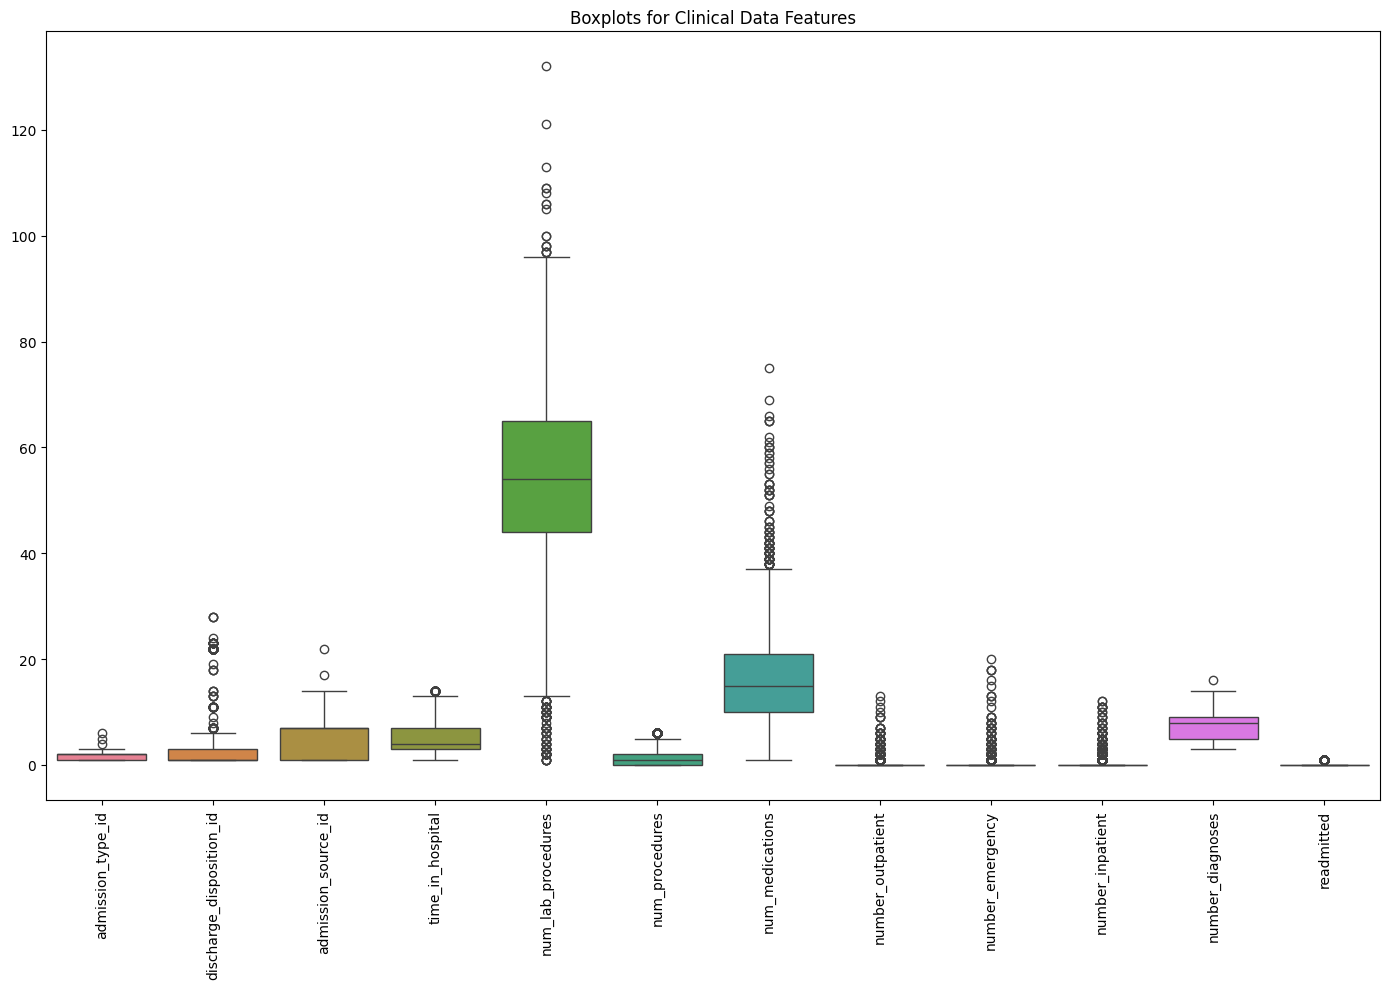

In [21]:
# Remove 'patient_nbr' from the data to plot
data_to_plot = data.drop(columns=['patient_nbr'])

# Plotting boxplots for all columns except 'patient_nbr'
plt.figure(figsize=(14, 10))
sns.boxplot(data=data_to_plot)
plt.xticks(rotation=90) 
plt.title('Boxplots for Clinical Data Features')
plt.tight_layout()  
plt.show()

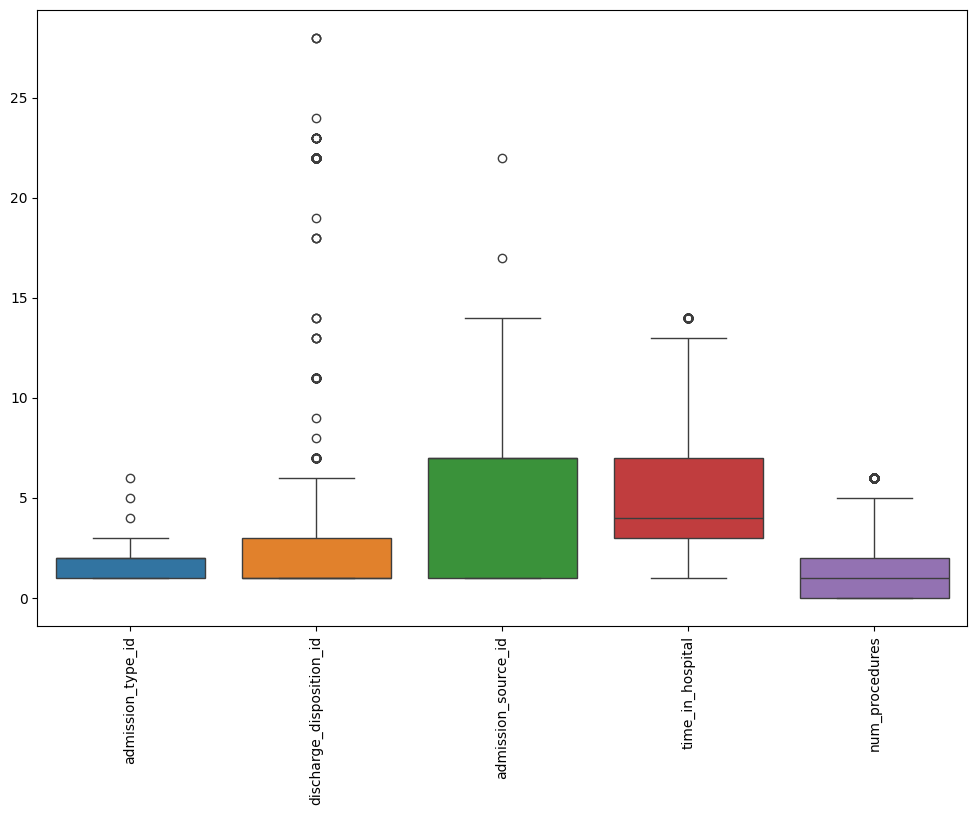

In [22]:
# Plot box plots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_procedures' ]].select_dtypes(include='number'))
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

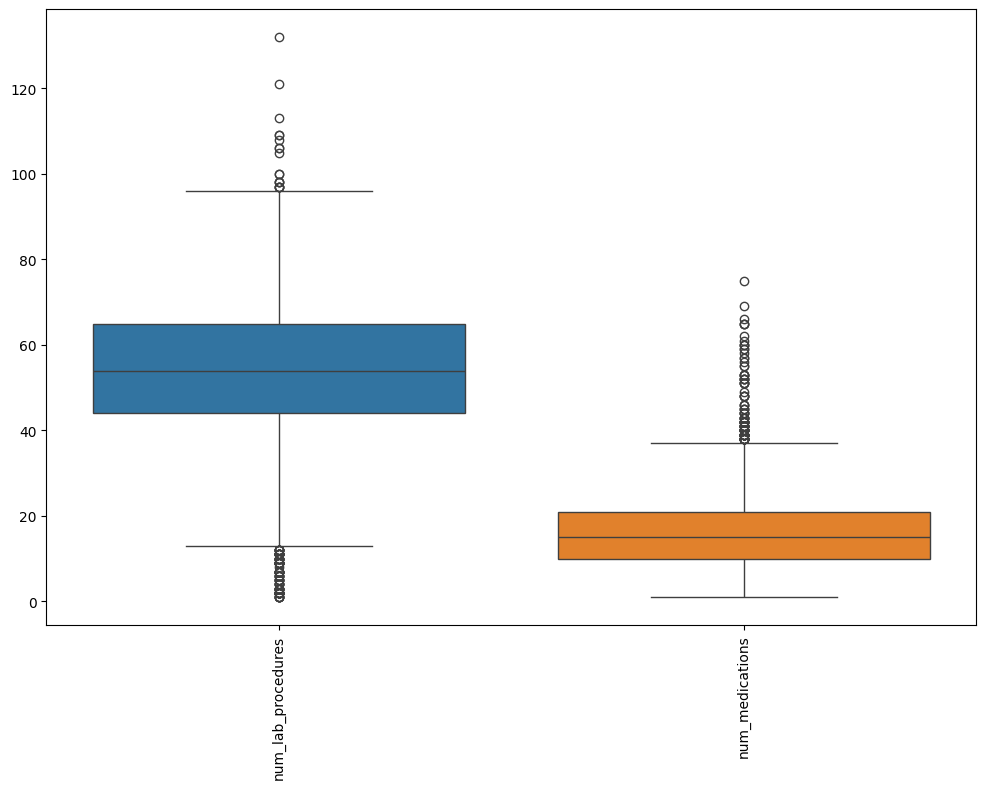

In [23]:
# Plot box plots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['num_lab_procedures', 'num_medications']].select_dtypes(include='number'))
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

In [24]:
# Remove outliers from specified columns using the Interquartile Range (IQR) method.

def remove_outliers(data, cols):
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Define colums to remove outliers
columns_with_outliers = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'number_diagnoses', 'num_medications'] 

# Call the function to remove outliers
data_minus_outliers = remove_outliers(data, columns_with_outliers)



In [25]:
data_minus_outliers.shape

(3748, 30)

In [26]:
#Normalize dataset

def normalize(data_minus_outliers, additional_cols_to_drop=None):
    # Selecting only numerical columns for normalization
    num_cols = data_minus_outliers.select_dtypes(include=[np.number]).columns

    # Excluding 'readmitted' column from normalization
    if 'readmitted' in num_cols:
        num_cols = num_cols.drop('readmitted')

    # Drop additional columns if specified
    if additional_cols_to_drop is not None:
        num_cols = num_cols.drop(additional_cols_to_drop)

    # Normalizing the numerical columns using min-max scaling
    data_norm = data_minus_outliers.copy()
    data_norm[num_cols] = (data_norm[num_cols] - data_norm[num_cols].min()) / (data_norm[num_cols].max() - data_norm[num_cols].min())
    return data_norm

# Apply normalization function
data_norm = normalize(data_minus_outliers)


In [27]:
data_norm.shape

(3748, 30)

In [28]:
data_norm.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000
mean,0.320083,0.161686,0.060180,0.263557,0.310232,0.499457,0.208164,0.420067,0.014798,0.016083,0.038687,0.386922,0.095518
std,0.209344,0.148813,0.144901,0.164283,0.236146,0.176139,0.274701,0.199093,0.062761,0.062451,0.094203,0.175548,0.293968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.128622,0.000000,0.000000,0.000000,0.166667,0.373494,0.000000,0.264706,0.000000,0.000000,0.000000,0.181818,0.000000
50%,0.301918,0.200000,0.000000,0.375000,0.250000,0.493976,0.000000,0.411765,0.000000,0.000000,0.000000,0.454545,0.000000
75%,0.502260,0.200000,0.074074,0.375000,0.416667,0.626506,0.400000,0.558824,0.000000,0.000000,0.083333,0.545455,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

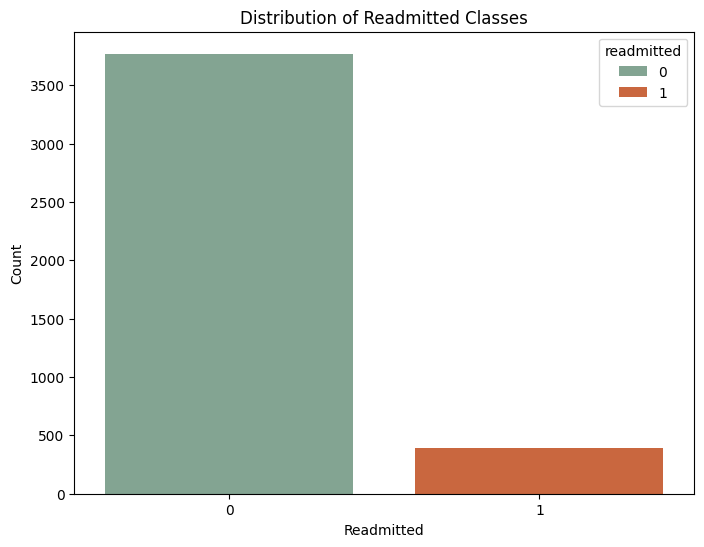

In [29]:
# Plot the distribution of unique classes of readmitted

hue_order = [0, 1]

custom_palette = {1: "#e05d28", 0: "#7DAA92"}

plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', hue='readmitted', data=data, palette=custom_palette, legend=True)
plt.title('Distribution of Readmitted Classes')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()

In [30]:
readmitted_counts = data_norm['readmitted'].value_counts()

print("Count of each Readmitted class:")
print(readmitted_counts)

Count of each Readmitted class:
readmitted
0    3390
1     358
Name: count, dtype: int64


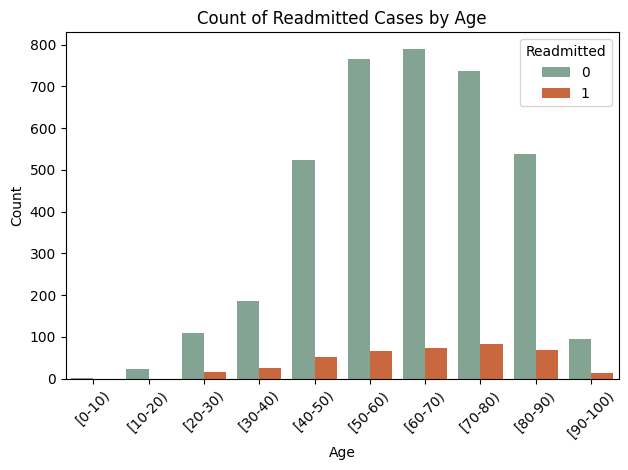

In [31]:
# Plot of readmitted cases against age

data['age'] = pd.Categorical(data['age'])

sns.countplot(x='age', hue='readmitted', data=data, palette = custom_palette)
plt.title('Count of Readmitted Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmitted', loc='upper right')
plt.tight_layout()
plt.show()

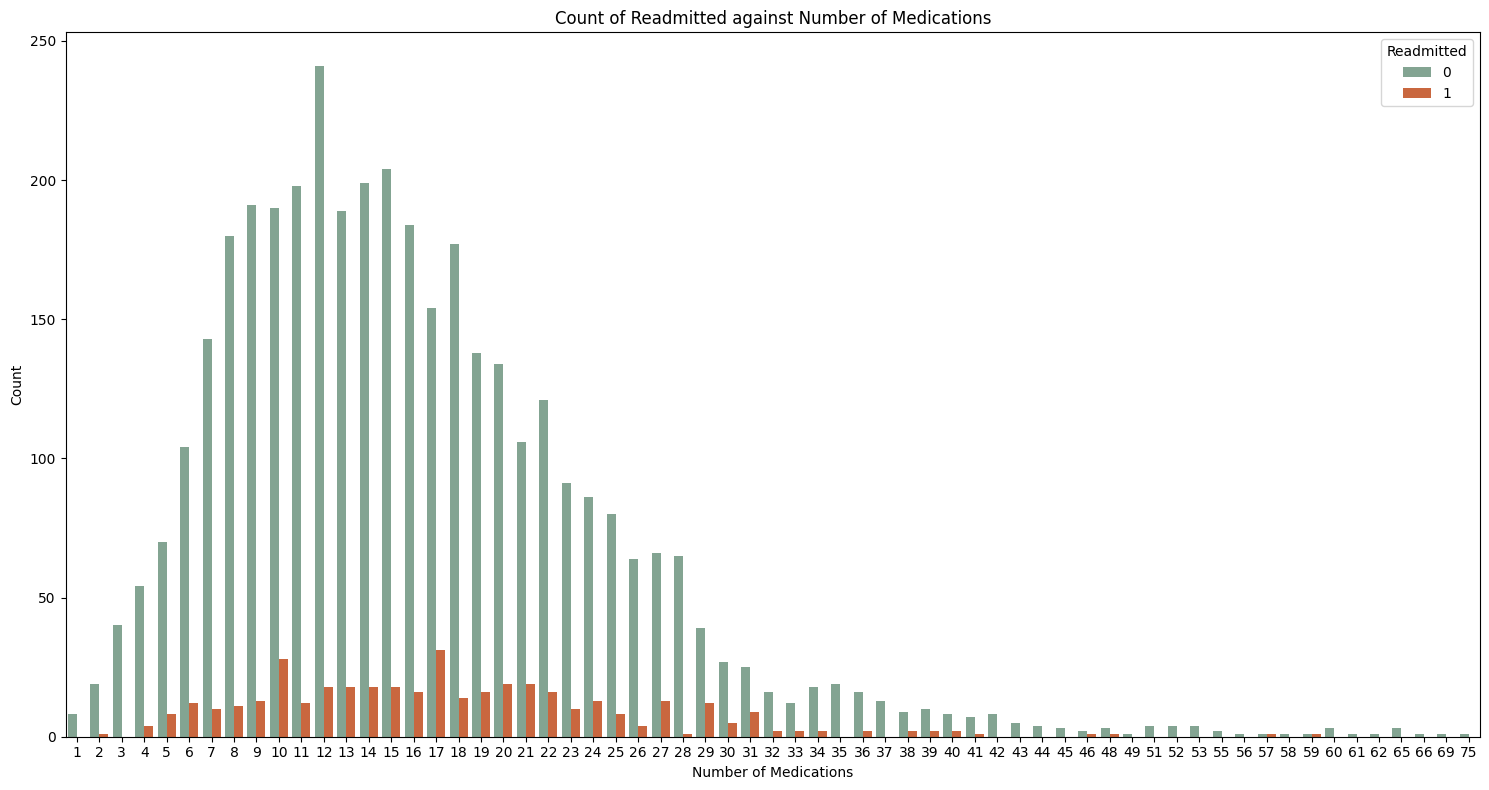

In [32]:
# Plot the count of target variable against the number of medications
plt.figure(figsize=(15, 8))
sns.countplot(x='num_medications', hue='readmitted', data=data, palette = custom_palette)
plt.title('Count of Readmitted against Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.tight_layout()
plt.show()

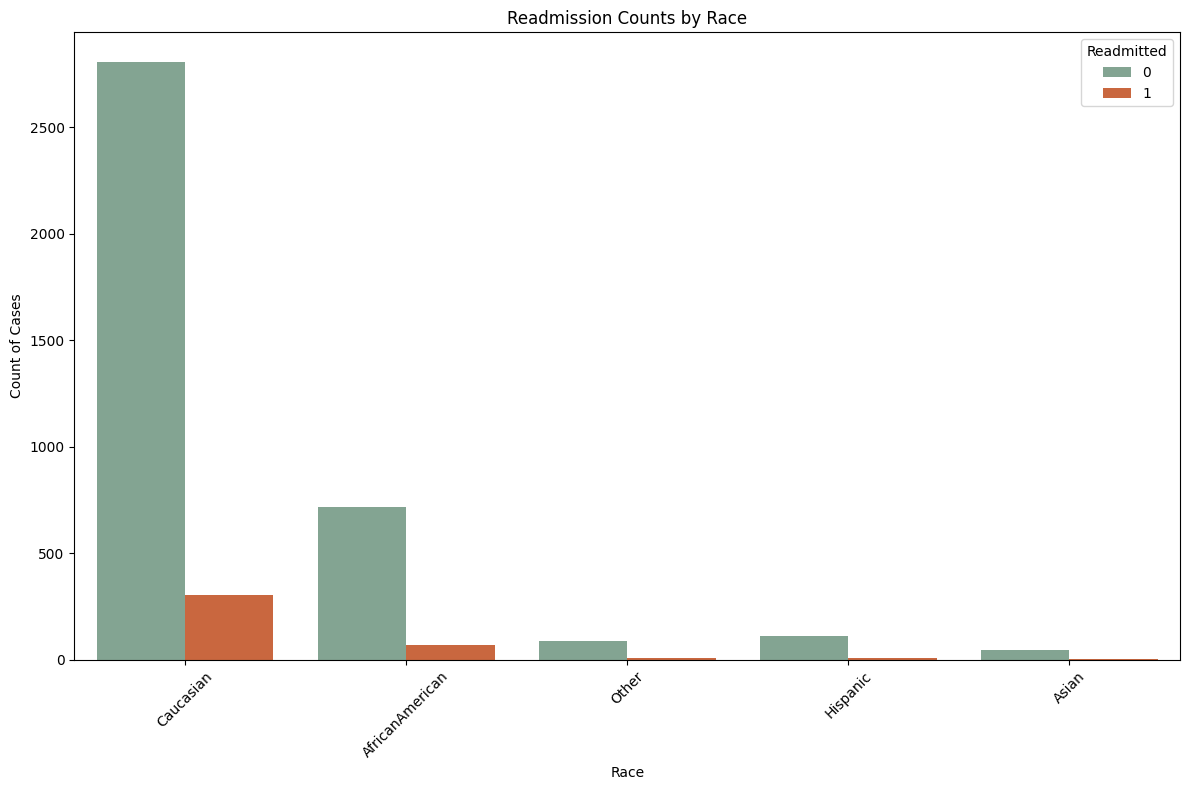

In [33]:
#Plot of readmission counts against race

plt.figure(figsize=(12, 8))
sns.countplot(x='race', hue='readmitted', data=data, palette={0: "#7DAA92", 1: "#e05d28"})
plt.title('Readmission Counts by Race')
plt.xlabel('Race')
plt.ylabel('Count of Cases')
plt.xticks(rotation=45) 
plt.legend(title='Readmitted',loc='upper right')
plt.tight_layout() 
plt.show()

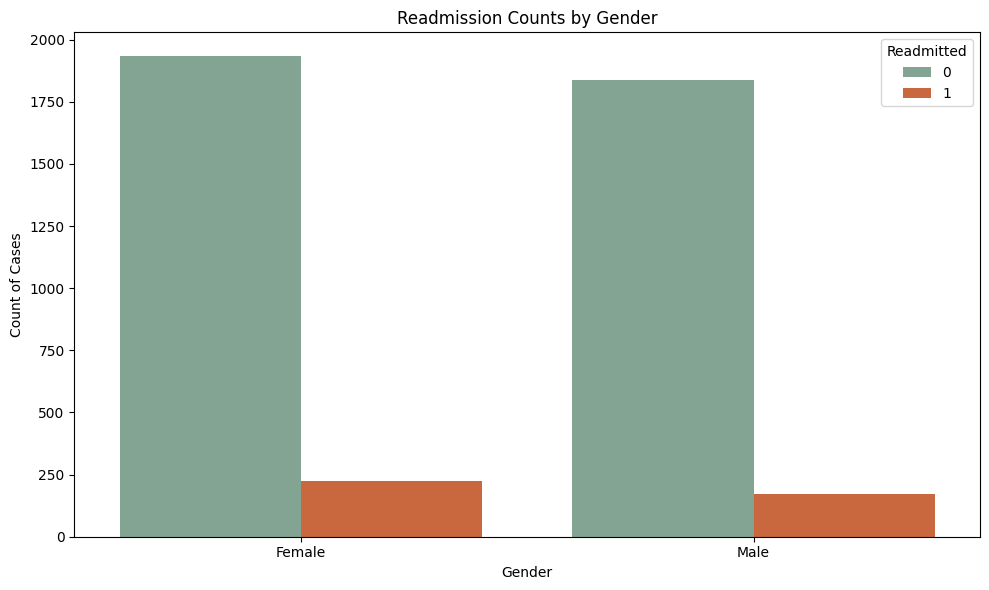

In [34]:
#Plot of Readmission Counts by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='readmitted', data=data, palette={0: "#7DAA92", 1: "#e05d28"})
plt.title('Readmission Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Cases')
plt.legend(title='Readmitted', loc='upper right')
plt.tight_layout()
plt.show()

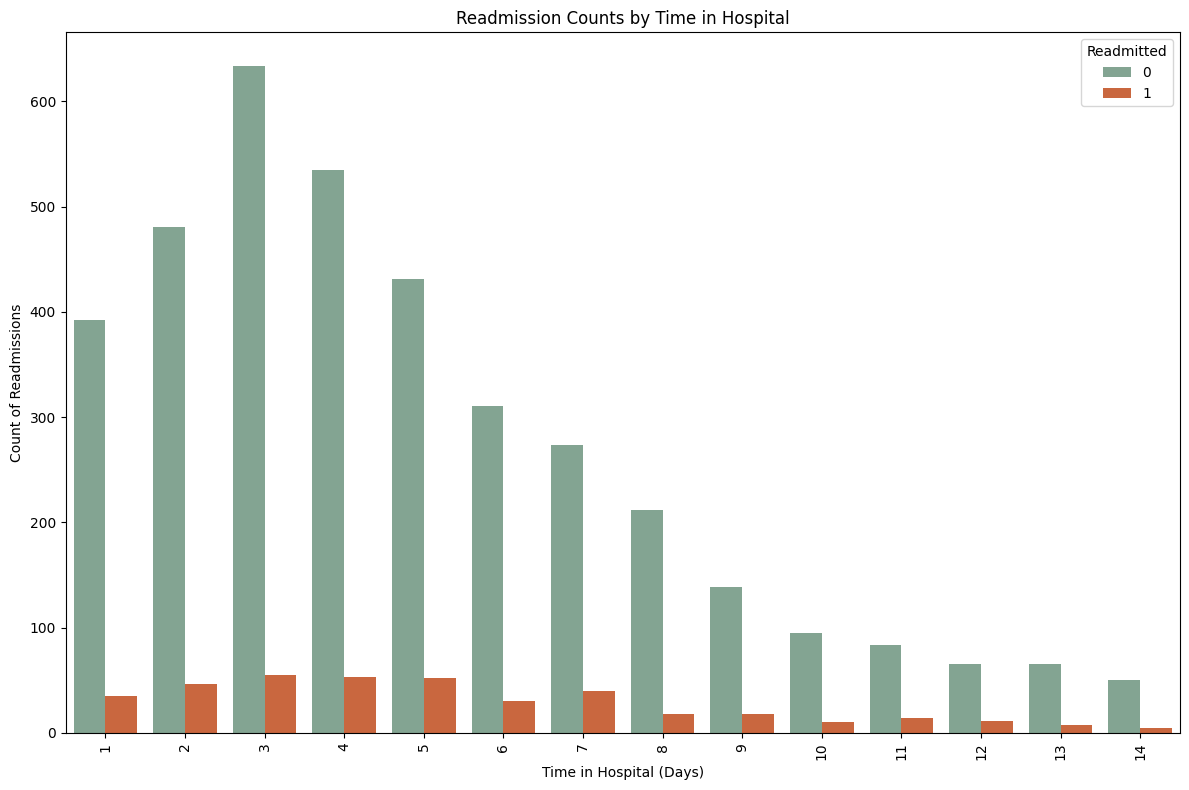

In [35]:
# Plot of Readmission against Time in Hospital


plt.figure(figsize=(12, 8))
sns.countplot(x='time_in_hospital', hue='readmitted', data=data, palette={0: "#7DAA92", 1: "#e05d28"})
plt.title('Readmission Counts by Time in Hospital')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Count of Readmissions')
plt.xticks(rotation=90)  # Rotate if there are many unique values and they overlap
plt.legend(title='Readmitted', loc='upper right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_107536/1515669638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette='Set2')


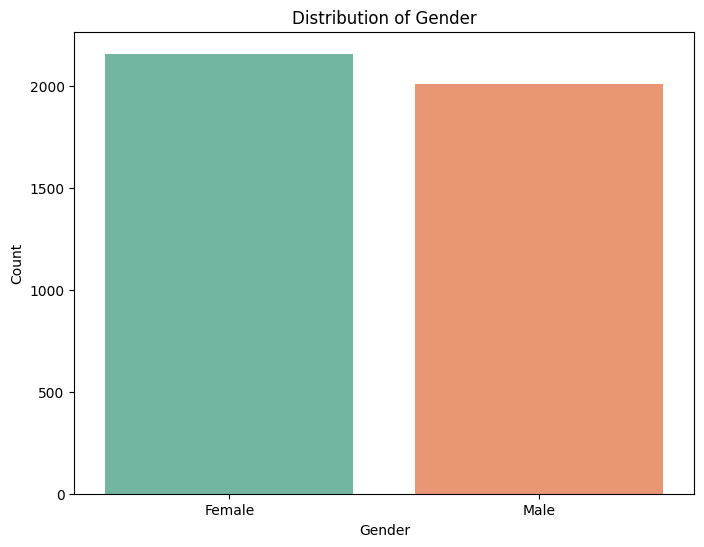

In [36]:
# Plot the distribution of gender


plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data, palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_107536/930111257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=data, palette='coolwarm')


Text(0.5, 1.0, 'Distribution of Age')

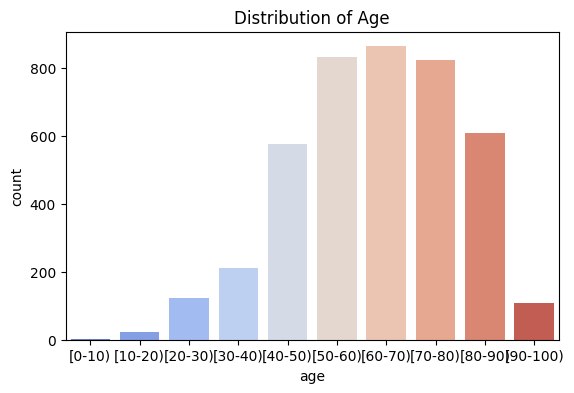

In [37]:
# Plot the distribution of age

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='age', data=data, palette='coolwarm')
plt.title("Distribution of Age")

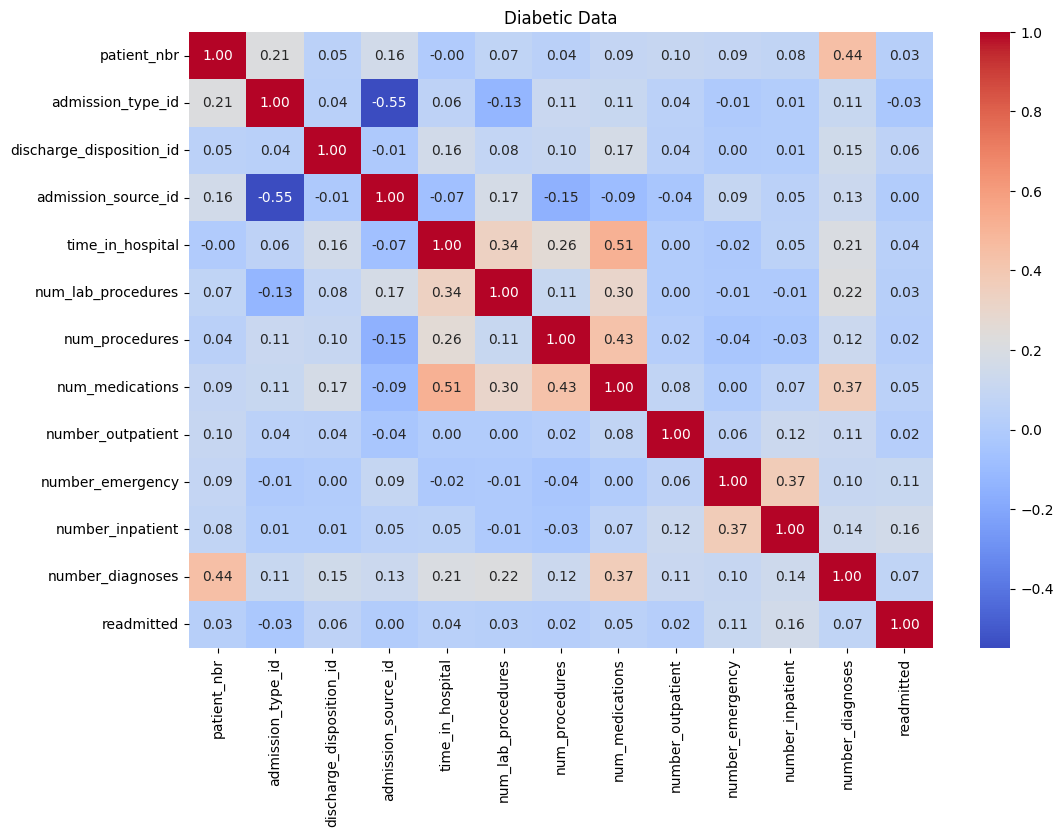

In [38]:
# Plotting Correlation Matrix

# Select numerical columns
numerical_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Diabetic Data')
plt.show()


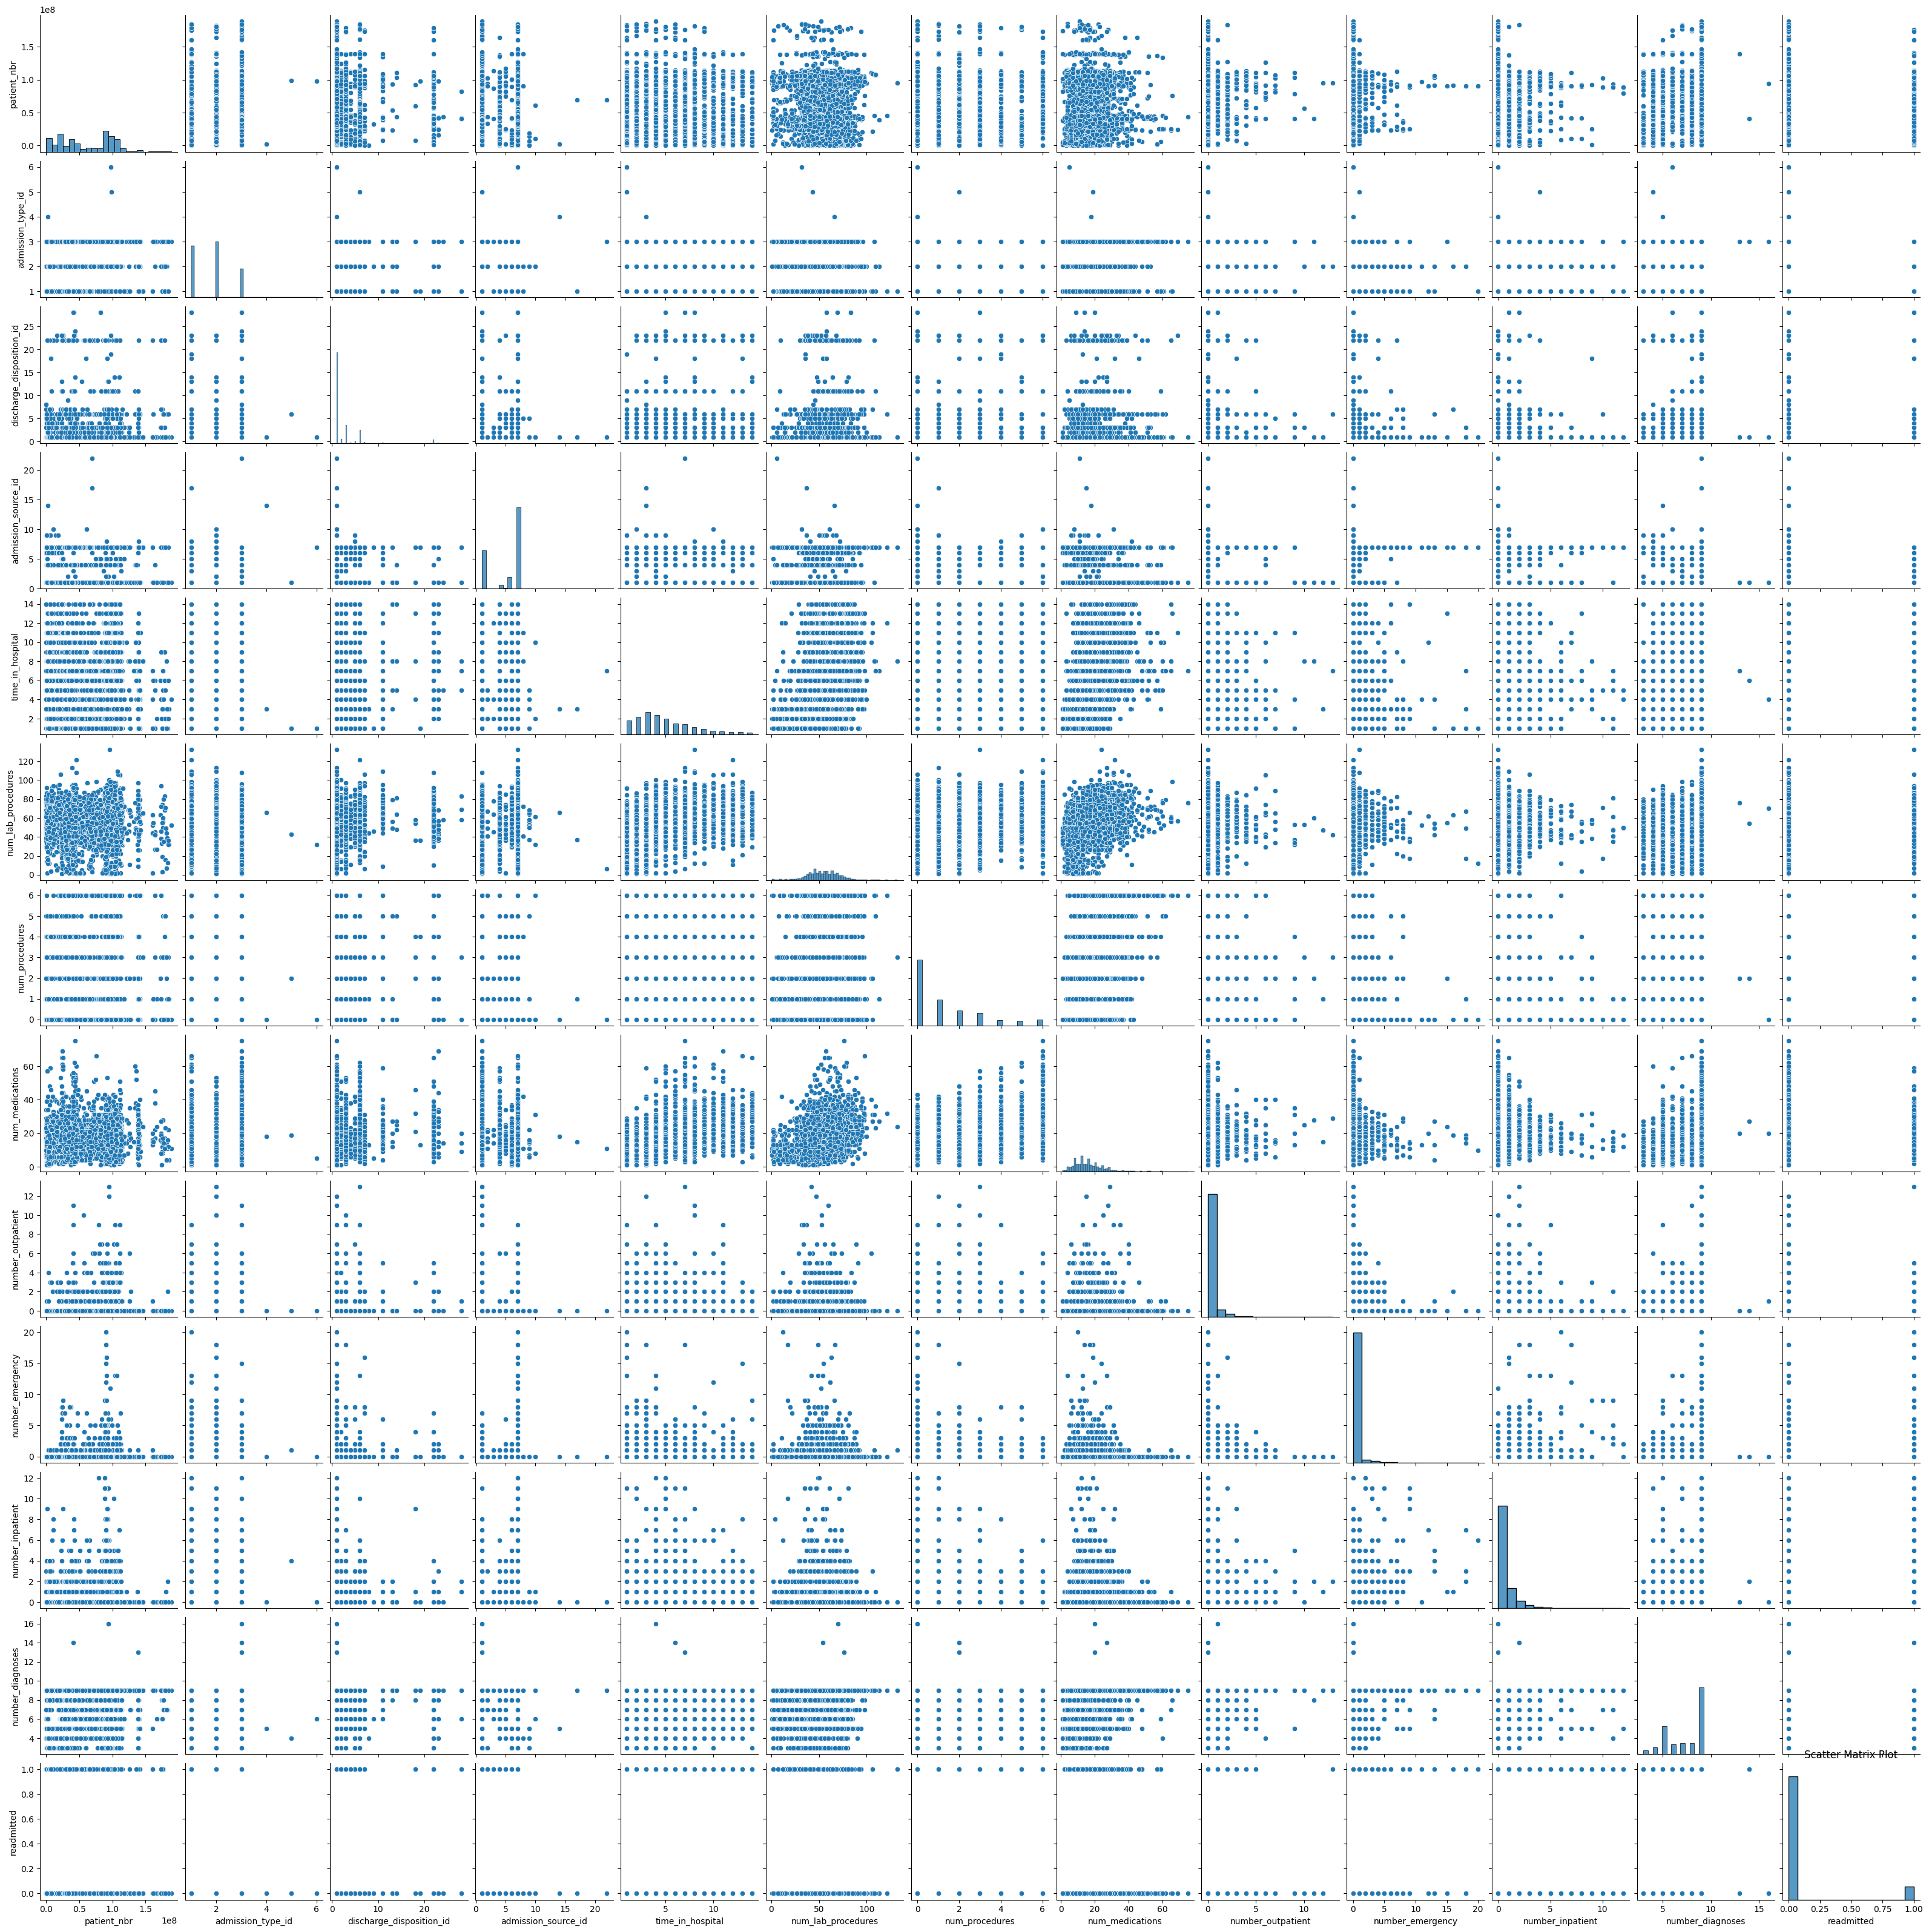

In [39]:
#Plotting Scatter Matrix Plot
sns.pairplot(data)
plt.title('Scatter Matrix Plot')
plt.show()

In [40]:
#Reassigning normalized data to original data variable

data = data_norm

# Model Building

In [41]:
import category_encoders as ce

In [42]:
#Encoding categorical variables

# Automatically identify categorical columns (those of type 'object')
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Use pd.get_dummies to one-hot encode the identified categorical columns
data_encoded = pd.get_dummies(data, columns=cat_cols)

# Convert dummy variables to binary values (0s and 1s)
data_encoded = data_encoded.astype(int)


In [43]:
data_encoded.head(10).T

,23879,24069,24117,24177,24228,24307,24367,24386,24402,24469
patient_nbr,0,0,0,0,0,0,0,0,0,0
admission_type_id,0,0,0,0,0,0,0,0,0,0
discharge_disposition_id,0,0,0,0,0,0,0,0,0,0
admission_source_id,0,0,0,0,0,0,0,0,0,0
time_in_hospital,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
insulin_Up,0,0,0,0,0,0,0,0,0,0
change_Ch,0,0,1,1,0,0,0,1,1,0
change_No,1,1,0,0,1,1,1,0,0,1
diabetesMed_No,0,0,0,0,1,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Selecting the predictors for the model 

features = ['num_medications', 'time_in_hospital', 'number_diagnoses','race_AfricanAmerican','race_Hispanic', 'race_Asian', 'race_Caucasian','race_Other', 'gender_Female', 'gender_Male']

# X is a DataFrame containing the features
X = data_encoded[features]

# y is containing the target variable
y = data_encoded['readmitted']

In [45]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [46]:
# Initializing the Logistic Regression model
model = LogisticRegression()

In [47]:
# Fitting the model with the training data
model.fit(X_train, y_train)



LogisticRegression()

In [48]:
# Predicting the target for the test set
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model against training data
train_accuracy = model.score(X_train, y_train)

# Evaluate the model against test data
test_accuracy = model.score(X_test, y_test)

print("Score against training data:", train_accuracy)
print("Score against test data:", test_accuracy)


Score against training data: 0.9059372915276851
Score against test data: 0.8986666666666666


In [50]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

# Calculate mean cross-validation score
cv_mean_score = cv_scores.mean()

print("Cross-validation mean score (accuracy):", cv_mean_score)


Cross-validation mean score (accuracy): 0.9044834224598931


In [51]:
# Predicting probabilities for the test set. Need probabilities for the positive class to plot ROC
y_prob = model.predict_proba(X_test)[:, 1]


Accuracy: 0.8986666666666666
Confusion Matrix:
 [[674   0]
 [ 76   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       674
           1       0.00      0.00      0.00        76

    accuracy                           0.90       750
   macro avg       0.45      0.50      0.47       750
weighted avg       0.81      0.90      0.85       750

ROC AUC Score: 0.557307121661721


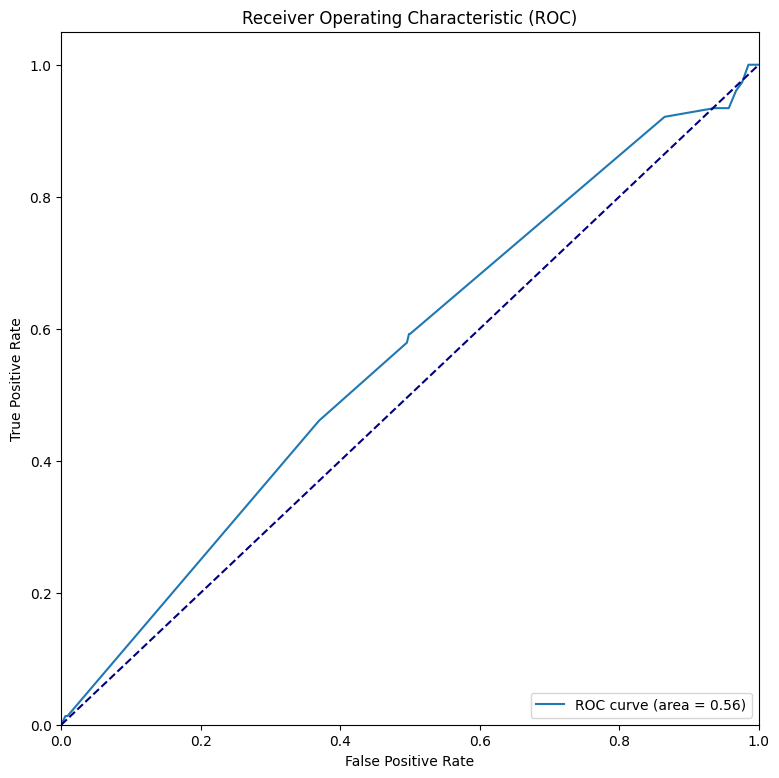

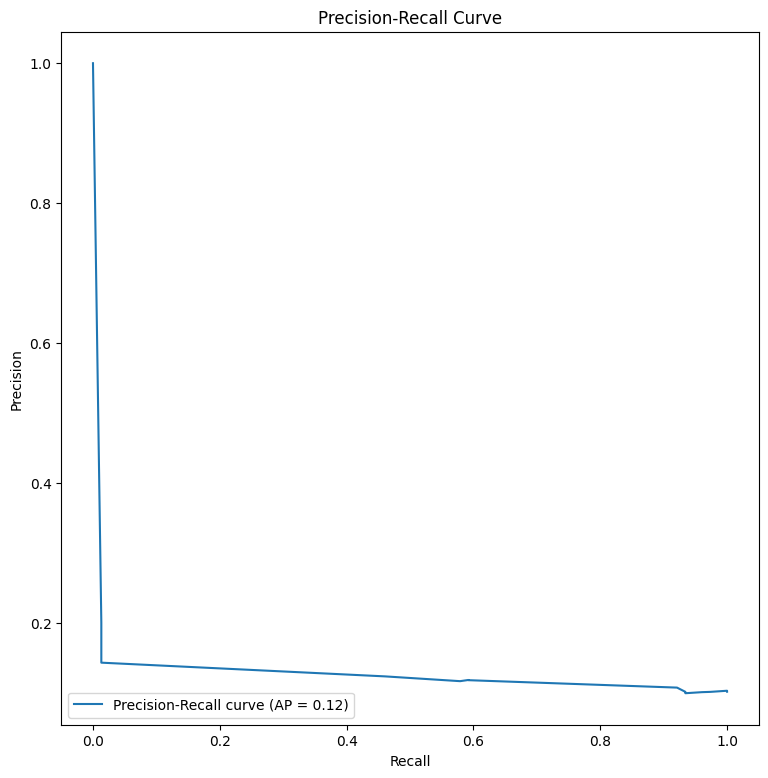

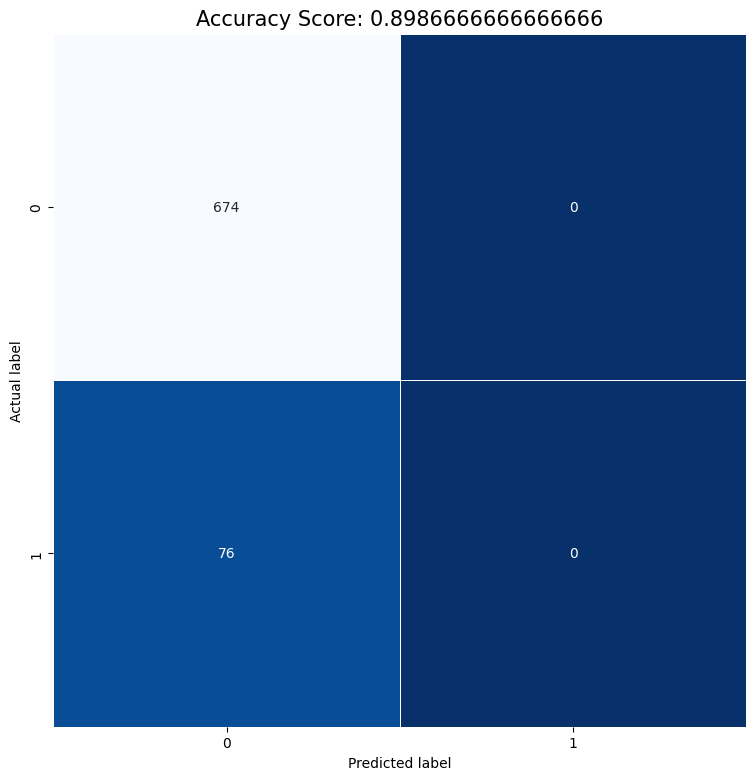

In [52]:
#Creating function for model evaluation

def evaluate_model(y_test, y_pred, y_prob):
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Print metrics
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("ROC AUC Score:", roc_auc)
    
    # Plot ROC curve
    plt.figure(figsize=(9, 9))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
   
    # Calculate Precision-Recall curve and Average Precision (AP)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    
    # Plot Precision-Recall curve
    plt.figure(figsize=(9, 9))
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ap = average_precision_score(y_test, y_prob)
    plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % ap)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()
    
    # Plot Confusion Matrix
    plt.figure(figsize=(9, 9))
    sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r', cbar=False)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = 'Accuracy Score: {0}'.format(accuracy)
    plt.title(title, size=15)
    plt.show()

evaluate_model(y_test, y_pred, y_prob)

### Balancing the data

In [53]:
from sklearn.utils import resample

# Separate majority and minority classes
data_majority = data_encoded[data_encoded['readmitted'] == 0]
data_minority = data_encoded[data_encoded['readmitted'] == 1]

# Undersample majority class to match the minority class size
data_majority_undersampled = resample(data_majority, replace=False, n_samples=len(data_minority),random_state=2)

# Combine the undersampled majority class with the original minority class
data_balanced = pd.concat([data_majority_undersampled, data_minority])


Accuracy: 0.5208333333333334
Confusion Matrix:
 [[41 26]
 [43 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.61      0.54        67
           1       0.57      0.44      0.50        77

    accuracy                           0.52       144
   macro avg       0.53      0.53      0.52       144
weighted avg       0.53      0.52      0.52       144

ROC AUC Score: 0.4738321380112425


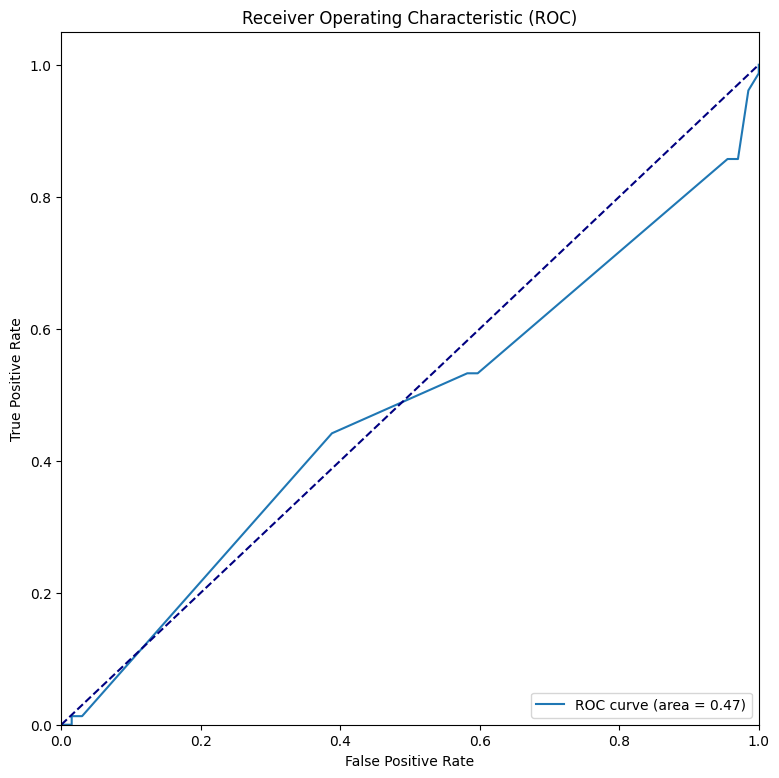

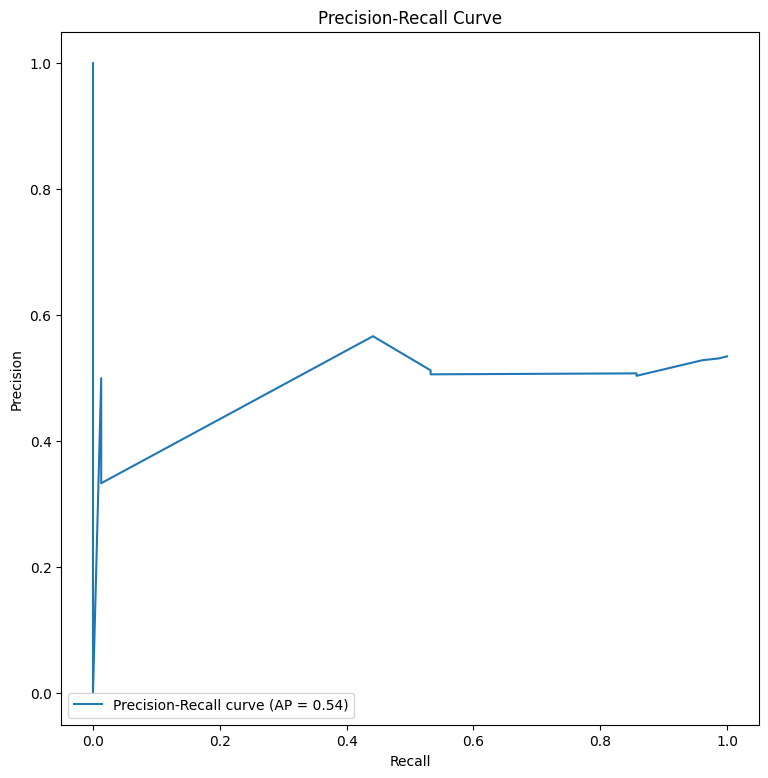

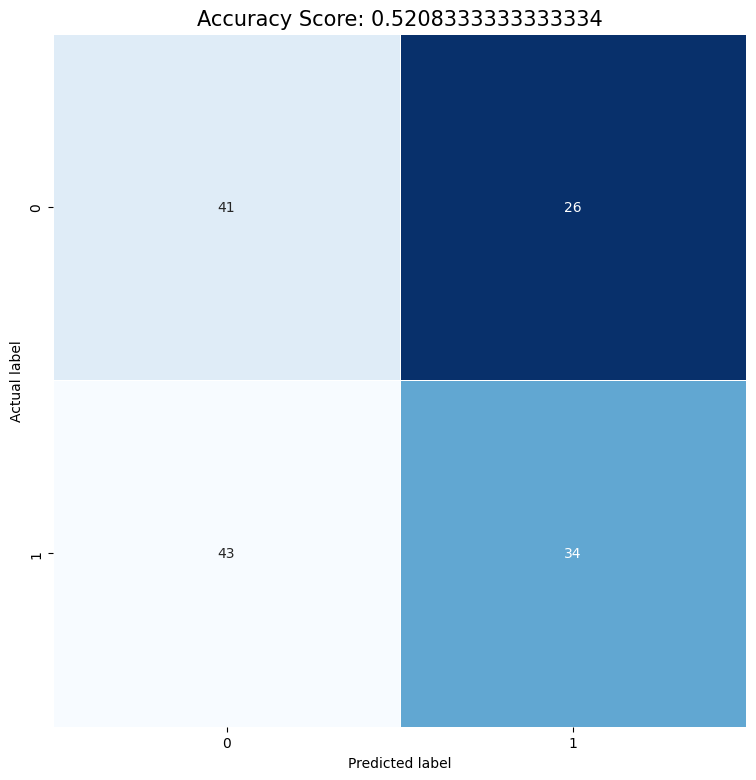

In [54]:
# Selecting the predictors for the model 
features = ['num_medications', 'time_in_hospital', 'number_diagnoses','race_AfricanAmerican','race_Hispanic', 'race_Asian', 'race_Caucasian','race_Other', 'gender_Female', 'gender_Male']

# X is the DataFrame containing the features
X = data_balanced[features] 
y = data_balanced['readmitted']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initializing and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting labels and probabilities on the test set
y_pred_balanced = model.predict(X_test)
y_prob_balanced = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
evaluate_model(y_test, y_pred_balanced, y_prob_balanced)

# Improved Model Building

In [55]:
#Load in dataset to new variable

data_im = pd.read_csv("diabetic_data.csv")

In [56]:
data_im.shape

(101766, 50)

In [57]:
# identify missing values
missing_values_im = data_im.isnull().sum()

# Show summary of missing values before replacement
print("Summary of missing values before replacing with NaN:")
print(missing_values_im)

Summary of missing values before replacing with NaN:
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide               

In [58]:
# Replace '?' with NaN
data_im.replace('?', np.nan, inplace=True)
print("Missing values replaced with NaN")

Missing values replaced with NaN


In [59]:
# Show summary of missing values after replacement

print("Summary of missing values after replacing with NaN:")
print(data_im.isnull().sum())

Summary of missing values after replacing with NaN:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                

In [60]:
data_im.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [61]:
# Convert 'readmitted' feature to binary
data_im['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0}, inplace=True)

## Processing numerical data

In [62]:
# deleting identifier columns

data_im.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

In [63]:
data_im.shape

(101766, 48)

In [64]:
# Creating a new feature 'hospital_visit' by summing the counts of inpatient, emergency, and outpatient visits,

data_im['hospital_visit'] = data_im['number_inpatient'] + data_im['number_emergency'] + data_im['number_outpatient'] 

In [65]:
# Dropping columns after consolidating counts into the 'hospital_visit' feature.

data_im.drop(['number_inpatient', 'number_emergency', 'number_outpatient'], axis=1,inplace=True)

In [66]:
data_im.columns


Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'hospital_visit'],
      dtype='object')

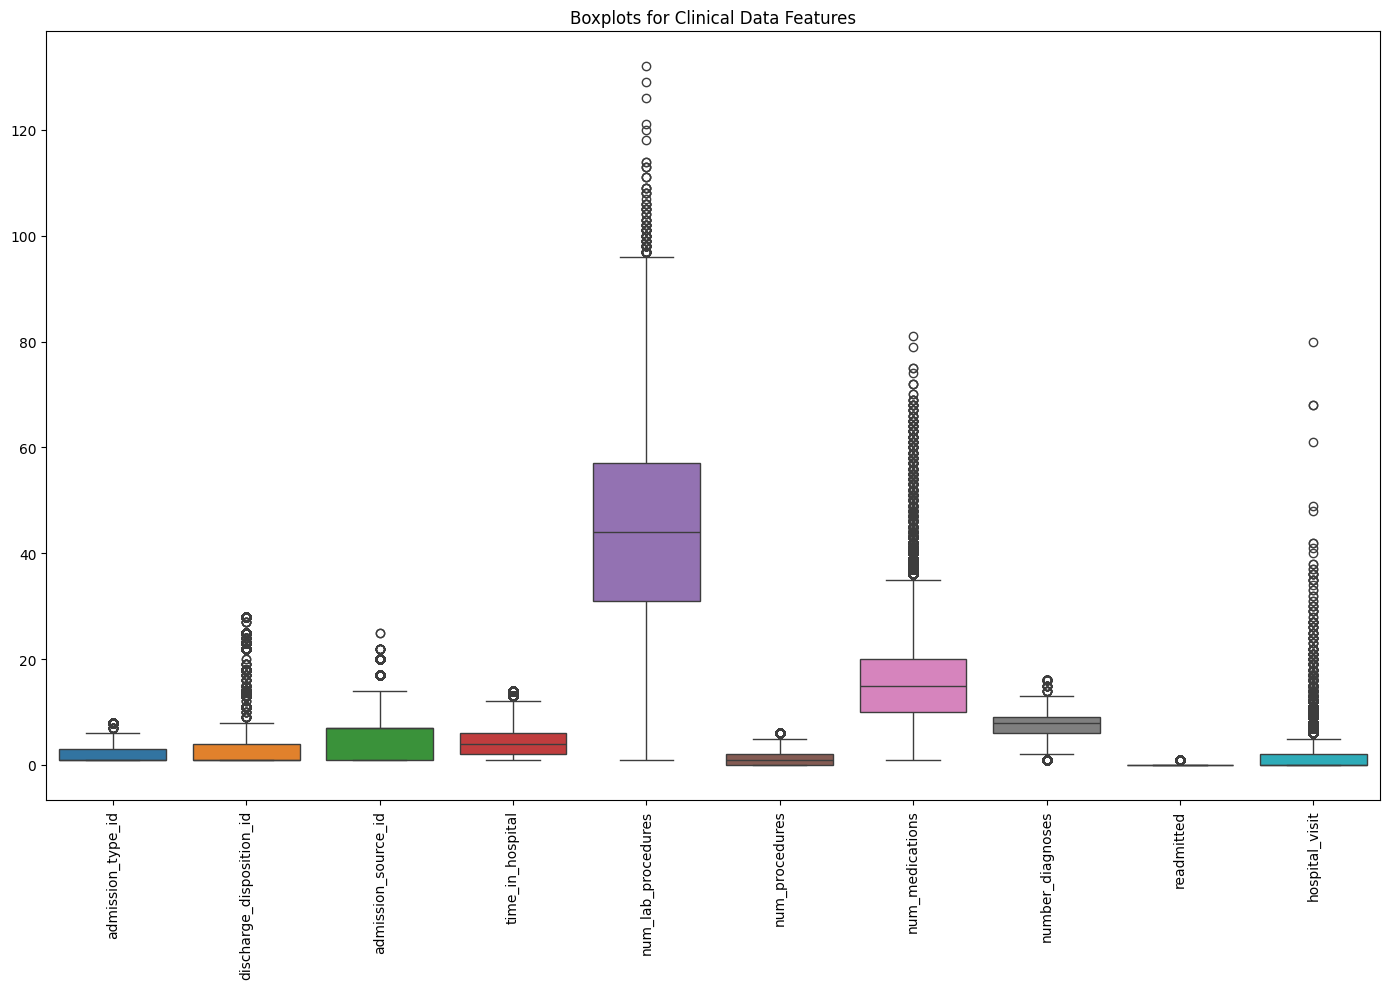

In [67]:
# Plotting boxplots for all numerical columns  
plt.figure(figsize=(14, 10))
sns.boxplot(data=data_im)
plt.xticks(rotation=90) 
plt.title('Boxplots for Clinical Data Features')
plt.tight_layout()  
plt.show()

In [68]:
#Removing the outliers

cols_outliers_im = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'number_diagnoses', 'num_medications', 'hospital_visit'] 

# Call the function to remove outliers
data_im = remove_outliers(data_im, cols_outliers_im)


In [69]:
data_im.describe().T

,count,mean,std,min,25%,50%,75%,max
admission_type_id,87983.0,2.002489,1.449335,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,87983.0,3.635077,5.233100,1.0,1.0,1.0,3.0,28.0
admission_source_id,87983.0,5.817828,4.034151,1.0,1.0,7.0,7.0,25.0
time_in_hospital,87983.0,4.062944,2.587984,1.0,2.0,3.0,5.0,12.0
num_lab_procedures,87983.0,42.199050,19.392077,1.0,31.0,43.0,56.0,96.0
num_procedures,87983.0,1.053692,1.345054,0.0,0.0,1.0,2.0,5.0
num_medications,87983.0,14.728072,6.361373,1.0,10.0,14.0,19.0,32.0
number_diagnoses,87983.0,7.347806,1.931906,2.0,6.0,8.0,9.0,13.0
readmitted,87983.0,0.105100,0.306684,0.0,0.0,0.0,0.0,1.0
hospital_visit,87983.0,0.859621,1.258298,0.0,0.0,0.0,1.0,5.0


In [70]:
#Normalizing the data_im dataframe using Min-Max Scaler

#Dropping id columns from numerical columns to normalize
additional_cols_to_drop =['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

#Calling functiom
data_im=normalize(data_im, additional_cols_to_drop)

In [71]:
data_im.describe().T

,count,mean,std,min,25%,50%,75%,max
admission_type_id,87983.0,2.002489,1.449335,1.0,1.000000,1.000000,3.000000,8.0
discharge_disposition_id,87983.0,3.635077,5.233100,1.0,1.000000,1.000000,3.000000,28.0
admission_source_id,87983.0,5.817828,4.034151,1.0,1.000000,7.000000,7.000000,25.0
time_in_hospital,87983.0,0.278449,0.235271,0.0,0.090909,0.181818,0.363636,1.0
num_lab_procedures,87983.0,0.433674,0.204127,0.0,0.315789,0.442105,0.578947,1.0
num_procedures,87983.0,0.210738,0.269011,0.0,0.000000,0.200000,0.400000,1.0
num_medications,87983.0,0.442841,0.205206,0.0,0.290323,0.419355,0.580645,1.0
number_diagnoses,87983.0,0.486164,0.175628,0.0,0.363636,0.545455,0.636364,1.0
readmitted,87983.0,0.105100,0.306684,0.0,0.000000,0.000000,0.000000,1.0
hospital_visit,87983.0,0.171924,0.251660,0.0,0.000000,0.000000,0.200000,1.0


# Processing categorical data

In [72]:
#Dropping columns with over 40% missing values

dropped_columns = drop_columns_with_high_missing_values(data_im, threshold=40)

print("Dropped columns:", dropped_columns)

Dropped columns: (4, Index(['weight', 'medical_specialty', 'max_glu_serum', 'A1Cresult'], dtype='object'))


In [73]:
#Dropping variables that are irrelevant towards prediction

cols_irrelevant = ['payer_code','diag_1','diag_2','diag_3']

data_im.drop(cols_irrelevant, axis=1, inplace=True)


In [74]:
#Checking value counts of race

data_im['race'].value_counts()

race
Caucasian          65343
AfricanAmerican    16917
Hispanic            1824
Other               1303
Asian                580
Name: count, dtype: int64

In [75]:
#Filling missing values in race with mode

data_im['race'] = data_im['race'].fillna(data_im['race'].mode()[0])

In [76]:
#Checking value counts of gender

data_im['gender'].value_counts()

gender
Female             47683
Male               40297
Unknown/Invalid        3
Name: count, dtype: int64

In [77]:
#Filling missing values in gender with mode

data_im['gender'] = data_im['gender'].replace('Unknown/Invalid', np.nan)
data_im['gender'] = data_im['gender'].fillna(data_im['gender'].mode()[0])

In [78]:
data_im['age'].value_counts()

age
[70-80)     22663
[60-70)     18988
[80-90)     15497
[50-60)     14635
[40-50)      8252
[30-40)      3290
[90-100)     2630
[20-30)      1354
[10-20)       560
[0-10)        114
Name: count, dtype: int64

In [79]:
data_im['age'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[60-70)', '[70-80)',
       '[90-100)', '[80-90)', '[50-60)', '[0-10)'], dtype=object)

In [80]:
#Encoding age variable

data_im['age']=data_im['age'].replace({'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5,
       '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9 })

In [81]:
data_im['age'].value_counts()

age
7    22663
6    18988
8    15497
5    14635
4     8252
3     3290
9     2630
2     1354
1      560
0      114
Name: count, dtype: int64

In [82]:
data_im['admission_type_id'].value_counts()

admission_type_id
1    47748
2    15984
3    15095
6     4536
5     4313
8      281
7       17
4        9
Name: count, dtype: int64

In [83]:
#Loading IDS_Mapping dataset
id_map= pd.read_csv('IDS_mapping.csv')

In [84]:
id_map.head(10)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [85]:
##Mapping admission_type_id to id_map dataframe


data_im['admission_type_id']=data_im['admission_type_id'].replace({1:'Emergency', 2:'Emergency', 7:'Emergency', 5: 'Not Available', 
                                                                   6:'Not Available', 8:'Not Available', 3:'Elective', 4:'Newborn'})


In [86]:
data_im['admission_type_id'].value_counts()

admission_type_id
Emergency        63749
Elective         15095
Not Available     9130
Newborn              9
Name: count, dtype: int64

/tmp/ipykernel_107536/1679956068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='admission_type_id', y='age', data=data_im, palette='Set2')


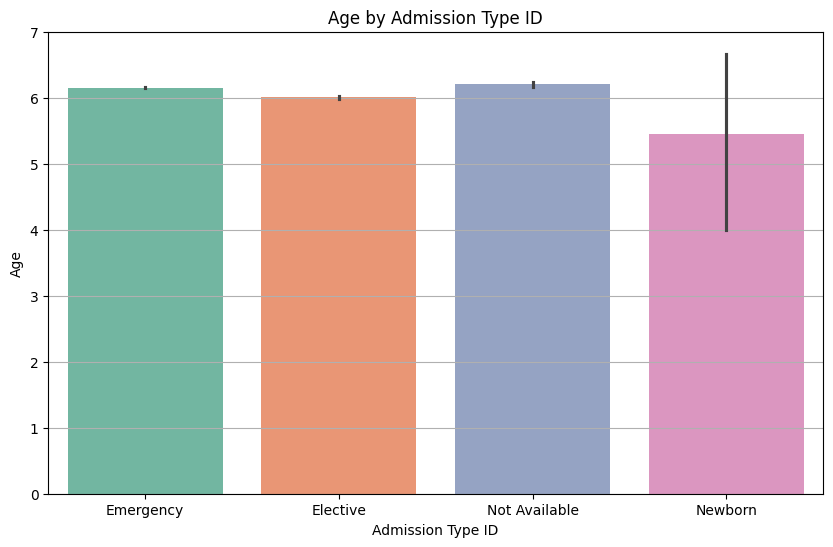

In [87]:
# Plotting a bar chart of age by admission type
plt.figure(figsize=(10, 6))
sns.barplot(x='admission_type_id', y='age', data=data_im, palette='Set2')
plt.xlabel('Admission Type ID')
plt.ylabel('Age')
plt.title('Age by Admission Type ID')
plt.grid(axis='y')
plt.show()


In [88]:
#Dropping Newborn as it does not correspond with age values and missing values
data_im.drop(data_im.index[data_im['admission_type_id']=='Newborn'], inplace = True)
data_im.drop(data_im.index[data_im['admission_type_id']=='Not Available'], inplace = True)


In [89]:
data_im['admission_type_id'].value_counts()

admission_type_id
Emergency    63749
Elective     15095
Name: count, dtype: int64

In [90]:
#Viewing discharge_disposition_ids in mapped dataframe
id_map.iloc[9:41] 

,admission_type_id,description
9,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital


In [91]:
##Mapping discharge_disposition_id to id_map dataframe


data_im['discharge_disposition_id']= data_im['discharge_disposition_id'].replace({1:'Discharged to home',6:'Discharged to home', 8:'Discharged to home',
2:'Discharged to different facility',3:'Discharged to different facility',4:'Discharged to different facility',5:'Discharged to different facility',16:'Discharged to different facility',
22:'Discharged to different facility',23:'Discharged to different facility',24:'Discharged to different facility',27:'Discharged to different facility',28:'Discharged to different facility',29:'Discharged to different facility',30:'Discharged to different facility',
7:'Left AMA',
9:'Patient within hospital',12:'Patient within hospital',
15:'Patient within hospital',
17:'Patient within hospital',
10:'Neonate discharged',
11:'Expired/Hospice', 19:'Expired/Hospice',
20:'Expired/Hospice',
21:'Expired/Hospice',13:'Expired/Hospice',14:'Expired/Hospice',
18:'NULL',25:'NULL',26:'NULL'}) 

In [92]:
data_im['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                  57646
Discharged to different facility    15723
NULL                                 3146
Expired/Hospice                      1782
Left AMA                              476
Patient within hospital                71
Name: count, dtype: int64

In [93]:
#Dropping Expired/Hospice, Neonate discharged and Null values from discharge_disposition_id
data_im=data_im[data_im['discharge_disposition_id']!='Expired/Hospice']
data_im=data_im[data_im['discharge_disposition_id']!='Neonate discharged']
data_im=data_im[data_im['discharge_disposition_id']!='NULL']

In [94]:
data_im['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                  57646
Discharged to different facility    15723
Left AMA                              476
Patient within hospital                71
Name: count, dtype: int64

In [95]:
data_im['admission_source_id'].value_counts()

admission_source_id
7     45812
1     21576
6      2118
4      1915
2       773
17      766
5       591
20      133
9       124
3        82
8         9
22        7
10        5
25        2
14        1
11        1
13        1
Name: count, dtype: int64

In [96]:
#Viewing admission_source_id in mapped dataframe
id_map.iloc[42:] 

,admission_type_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [97]:
#Mapping admission_source_id to id_map dataframe
data_im['admission_source_id'] = data_im['admission_source_id'].replace({1:'Referral',2:'Referral',3:'Referral',
                                                                        4:'Transfer from health care facility',5:'Transfer from health care facility', 6:'Transfer from health care facility',
                                                                        10:'Transfer from health care facility',18:'Transfer from health care facility',
                                                                        19:'Transfer from health care facility',25:'Transfer from health care facility',26:'Transfer from health care facility',22:'Transfer from health care facility',
                                                                        7:'Emergency', 8:'Emergency', 9:'NULL',15:'NULL',17:'NULL',20:'NULL',21:'NULL',
                                                                        11:'Delivery',12:'Delivery',13:'Delivery',14:'Delivery',23:'Delivery',24:'Delivery'
                                                                        })


In [98]:
#Dropping Delivery and Null values from admission_source_id

data_im=data_im[data_im['admission_source_id']!='Delivery']
data_im=data_im[data_im['admission_source_id']!='NULL']

In [99]:
data_im['admission_source_id'].value_counts()

admission_source_id
Emergency                             45821
Referral                              22431
Transfer from health care facility     4638
Name: count, dtype: int64

### Encoding categorical columns

In [100]:
data_im['readmitted'].value_counts()

readmitted
0    65080
1     7810
Name: count, dtype: int64

In [101]:
#Encoding the gender column
data_im['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [102]:
data_im.head().T

,1,2,3,4,6
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,1,2,3,4,6
admission_type_id,Emergency,Emergency,Emergency,Emergency,Elective
discharge_disposition_id,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home
admission_source_id,Emergency,Emergency,Emergency,Emergency,Referral
time_in_hospital,0.181818,0.090909,0.090909,0.0,0.272727
num_lab_procedures,0.610526,0.105263,0.452632,0.526316,0.726316
num_procedures,0.0,1.0,0.2,0.0,0.2
num_medications,0.548387,0.387097,0.483871,0.225806,0.645161


In [103]:
data_im['change'].value_counts()

change
No    39435
Ch    33455
Name: count, dtype: int64

In [104]:
#encoding change column
data_im['change'].replace({'No': 0, 'Ch': 1}, inplace=True)

In [105]:
data_im['change'].value_counts()

change
0    39435
1    33455
Name: count, dtype: int64

In [106]:
data_im['diabetesMed'].value_counts()

diabetesMed
Yes    56349
No     16541
Name: count, dtype: int64

In [107]:
#Encoding diabetesMed column
data_im['diabetesMed'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [108]:
data_im['diabetesMed'].value_counts()

diabetesMed
1    56349
0    16541
Name: count, dtype: int64

In [109]:
data_im.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'hospital_visit'],
      dtype='object')

In [110]:
#Grouping medication into a list

medication=['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [111]:
#Checking variation in medication

for med in medication:
    print (data_im[med].value_counts())

metformin
No        57919
Steady    13805
Up          751
Down        415
Name: count, dtype: int64
repaglinide
No        71664
Steady     1107
Up           88
Down         31
Name: count, dtype: int64
nateglinide
No        72316
Steady      546
Up           20
Down          8
Name: count, dtype: int64
chlorpropamide
No        72848
Steady       38
Up            3
Down          1
Name: count, dtype: int64
glimepiride
No        68842
Steady     3671
Up          234
Down        143
Name: count, dtype: int64
acetohexamide
No    72890
Name: count, dtype: int64
glipizide
No        63693
Steady     8315
Up          511
Down        371
Name: count, dtype: int64
glyburide
No        65583
Steady     6407
Up          540
Down        360
Name: count, dtype: int64
tolbutamide
No        72877
Steady       13
Name: count, dtype: int64
pioglitazone
No        67524
Steady     5125
Up          167
Down         74
Name: count, dtype: int64
rosiglitazone
No        68321
Steady     4400
Up          117
Do

In [112]:
#Making list of medicine with variation
med_var=['metformin','insulin', 'glipizide', 'glyburide','rosiglitazone','pioglitazone','glimepiride', 'repaglinide']

In [113]:
# Showing value count of medicine with variation
for med in med_var:
    print (data_im[med].value_counts())

metformin
No        57919
Steady    13805
Up          751
Down        415
Name: count, dtype: int64
insulin
No        33969
Steady    22987
Down       8499
Up         7435
Name: count, dtype: int64
glipizide
No        63693
Steady     8315
Up          511
Down        371
Name: count, dtype: int64
glyburide
No        65583
Steady     6407
Up          540
Down        360
Name: count, dtype: int64
rosiglitazone
No        68321
Steady     4400
Up          117
Down         52
Name: count, dtype: int64
pioglitazone
No        67524
Steady     5125
Up          167
Down         74
Name: count, dtype: int64
glimepiride
No        68842
Steady     3671
Up          234
Down        143
Name: count, dtype: int64
repaglinide
No        71664
Steady     1107
Up           88
Down         31
Name: count, dtype: int64


In [114]:
#Deleting low variance medication
low_var=['nateglinide','chlorpropamide','acetohexamide'
,'tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin',
'glipizide-metformin','glimepiride-pioglitazone',
'metformin-rosiglitazone','metformin-pioglitazone']

data_im.drop(low_var, axis=1, inplace=True)

In [115]:
data_im.shape

(72890, 23)

In [116]:
#encoding med_var list
# Define a mapping dictionary
mapping = {'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1}

for med in med_var:
    # Replace values using the mapping dictionary
    data_im[med] = data_im[med].replace(mapping)

In [117]:
data_im['insulin'].value_counts()

insulin
0    56956
1    15934
Name: count, dtype: int64

In [118]:
# Perform one-hot encoding using pd.get_dummies
encoded_race = pd.get_dummies(data_im['race'], prefix='race')

# Convert dummy variables to binary values (0s and 1s)
encoded_race = encoded_race.astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
data_im = pd.concat([data_im, encoded_race], axis=1)

# Drop the original 'race' column since it's no longer needed
data_im.drop(columns=['race'], inplace=True)

In [119]:
data_im.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,...,insulin,change,diabetesMed,readmitted,hospital_visit,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
1,0,1,Emergency,Discharged to home,Emergency,0.181818,0.610526,0.0,0.548387,0.636364,...,1,1,1,0,0.0,0,0,1,0,0
2,0,2,Emergency,Discharged to home,Emergency,0.090909,0.105263,1.0,0.387097,0.363636,...,0,0,1,0,0.6,1,0,0,0,0
3,1,3,Emergency,Discharged to home,Emergency,0.090909,0.452632,0.2,0.483871,0.454545,...,1,1,1,0,0.0,0,0,1,0,0
4,1,4,Emergency,Discharged to home,Emergency,0.000000,0.526316,0.0,0.225806,0.272727,...,0,1,1,0,0.0,0,0,1,0,0
6,1,6,Elective,Discharged to home,Referral,0.272727,0.726316,0.2,0.645161,0.454545,...,0,1,1,0,0.0,0,0,1,0,0


In [120]:
# checking unique values in admission_type_id
data_im['admission_type_id'].unique()

array(['Emergency', 'Elective'], dtype=object)

In [121]:
#Encoding admission_type_id column

data_im['admission_type_id']=data_im['admission_type_id'].replace({'Emergency': 0, 'Elective': 1})

In [122]:
data_im['admission_type_id'].unique()

array([0, 1])

In [123]:
# checking unique values in discharge_disposition_id
data_im['discharge_disposition_id'].unique()

array(['Discharged to home', 'Discharged to different facility',
       'Left AMA', 'Patient within hospital'], dtype=object)

In [124]:
#Encoding discharge_disposition_id column

data_im['discharge_disposition_id']=data_im['discharge_disposition_id'].replace({'Discharged to home': 0, 'Discharged to different facility': 1,
                                                                               'Left AMA': 2, 'Patient within hospital': 3 })


In [125]:
data_im['discharge_disposition_id'].unique()

array([0, 1, 2, 3])

In [126]:
# checking unique values in admission_source_id
data_im['admission_source_id'].unique()

array(['Emergency', 'Referral', 'Transfer from health care facility'],
      dtype=object)

In [127]:
#Encoding discharge_disposition_id column

data_im['admission_source_id']=data_im['admission_source_id'].replace({'Emergency': 0, 'Referral': 1,
                                                                     'Transfer from health care facility': 2 })


In [128]:
data_im['admission_source_id'].unique()

array([0, 1, 2])

In [129]:
data_im.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,72890.0,0.455261,0.497998,0.0,0.000000,0.000000,1.000000,1.0
age,72890.0,6.098683,1.605911,0.0,5.000000,6.000000,7.000000,9.0
admission_type_id,72890.0,0.194608,0.395902,0.0,0.000000,0.000000,0.000000,1.0
discharge_disposition_id,72890.0,0.227590,0.441062,0.0,0.000000,0.000000,0.000000,3.0
admission_source_id,72890.0,0.434998,0.610770,0.0,0.000000,0.000000,1.000000,2.0
time_in_hospital,72890.0,0.276596,0.233164,0.0,0.090909,0.181818,0.363636,1.0
num_lab_procedures,72890.0,0.438527,0.201259,0.0,0.326316,0.452632,0.578947,1.0
num_procedures,72890.0,0.209400,0.268999,0.0,0.000000,0.200000,0.400000,1.0
num_medications,72890.0,0.441577,0.205146,0.0,0.290323,0.419355,0.580645,1.0
number_diagnoses,72890.0,0.491820,0.175048,0.0,0.363636,0.545455,0.636364,1.0


In [130]:
data_im.shape

(72890, 27)

In [131]:
data_im['readmitted'].value_counts()

readmitted
0    65080
1     7810
Name: count, dtype: int64

# Improved Model

In [132]:
# Separate majority and minority classes
data_majority_im = data_im[data_im['readmitted'] == 0]
data_minority_im = data_im[data_im['readmitted'] == 1]

# Undersample majority class to match the minority class size
data_majority_im_undersampled = resample(data_majority_im, replace=False, n_samples=len(data_minority_im),random_state=2)

# Combine the undersampled majority class with the original minority class
data_balanced_im = pd.concat([data_majority_im_undersampled, data_minority_im])

# Shuffle the DataFrame
data_balanced_im = data_balanced_im.sample(frac=1, random_state=2).reset_index(drop=True)

# Separate X and y again
X = data_balanced_im.drop(['readmitted'], axis=1)
y = data_balanced_im['readmitted']

In [133]:
data_balanced_im['readmitted'].value_counts()

readmitted
0    7810
1    7810
Name: count, dtype: int64

In [134]:
X.shape

(15620, 26)

In [135]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Determine the number of components to keep based on explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1  # Retain components explaining 98% variance

In [136]:
# Select the principal components
X_train_selected = X_pca[:, :num_components]
X_train_selected.shape

(15620, 15)

In [137]:
X_train_selected

array([[ 0.16497679,  0.84210167, -0.47656982, ..., -0.01952381,
        -0.04691166, -0.09624574],
       [ 0.09535495, -0.90878843,  0.60892737, ..., -0.07219048,
        -0.27978346, -0.09210106],
       [ 2.29106957, -0.10530267,  0.82547186, ..., -0.06236773,
         0.2286802 ,  0.06830669],
       ...,
       [-0.80233143,  0.59634933,  0.77070488, ..., -0.01824327,
         0.14741368,  0.01409626],
       [-0.84448092, -0.21273243, -0.53563486, ..., -0.02525974,
        -0.1674104 , -0.02685577],
       [-0.81357125,  0.9633783 ,  0.13444809, ...,  0.00515005,
         0.23648159,  0.06368876]])

In [138]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y, test_size=0.2, random_state=2)


In [139]:
# Train on undersampled data
model_undersampled = LogisticRegression(max_iter=1000, random_state=2)
model_undersampled.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=2)

In [140]:
# Evaluate undersampled model
y_pred_undersampled = model_undersampled.predict(X_test)
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
print("Undersampled Model Accuracy on Test Data:", accuracy_undersampled)

Undersampled Model Accuracy on Test Data: 0.5797055057618438


Accuracy: 0.5797055057618438
Confusion Matrix:
 [[978 558]
 [755 833]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.64      0.60      1536
           1       0.60      0.52      0.56      1588

    accuracy                           0.58      3124
   macro avg       0.58      0.58      0.58      3124
weighted avg       0.58      0.58      0.58      3124

ROC AUC Score: 0.5806389719773299


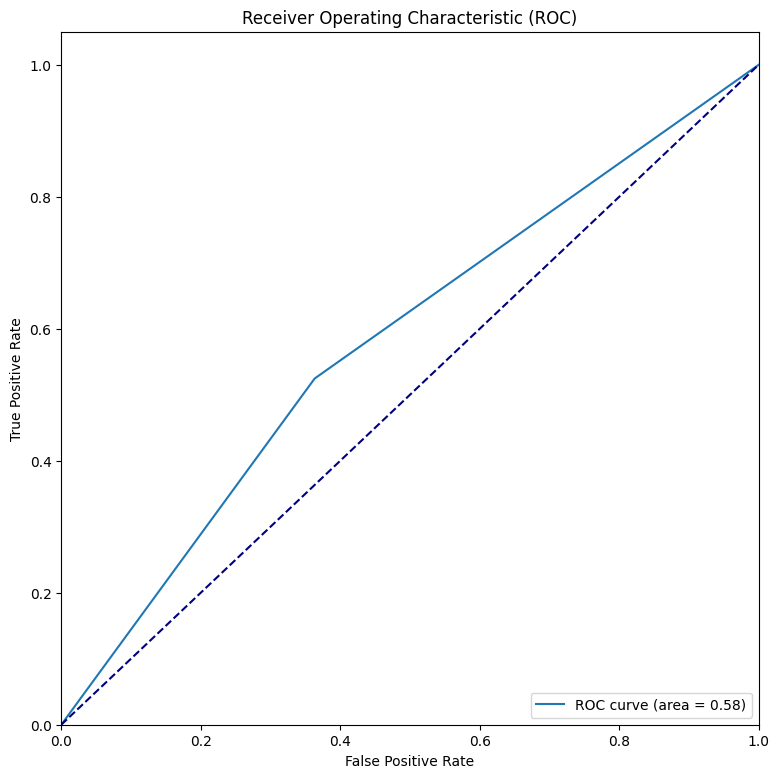

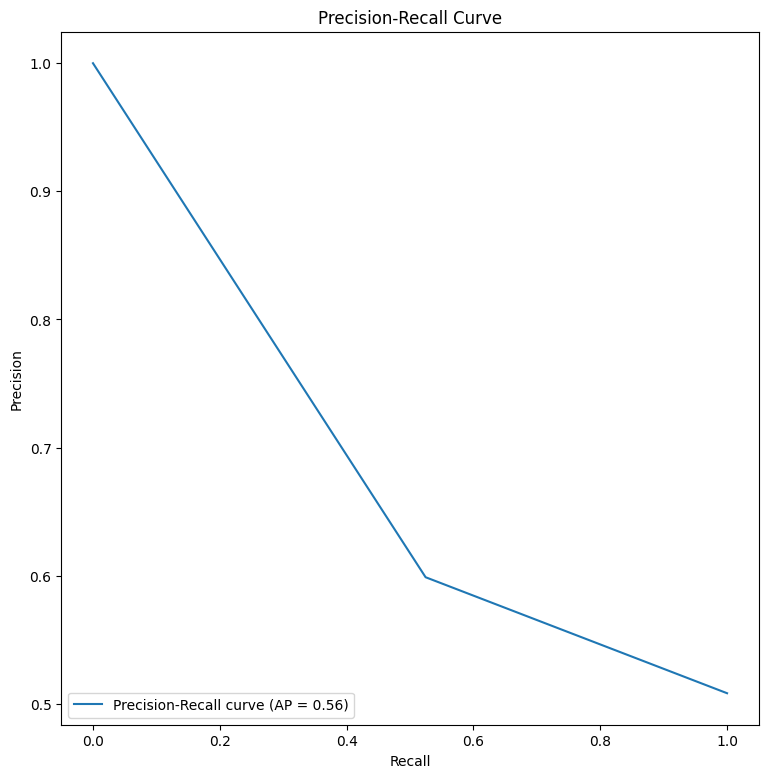

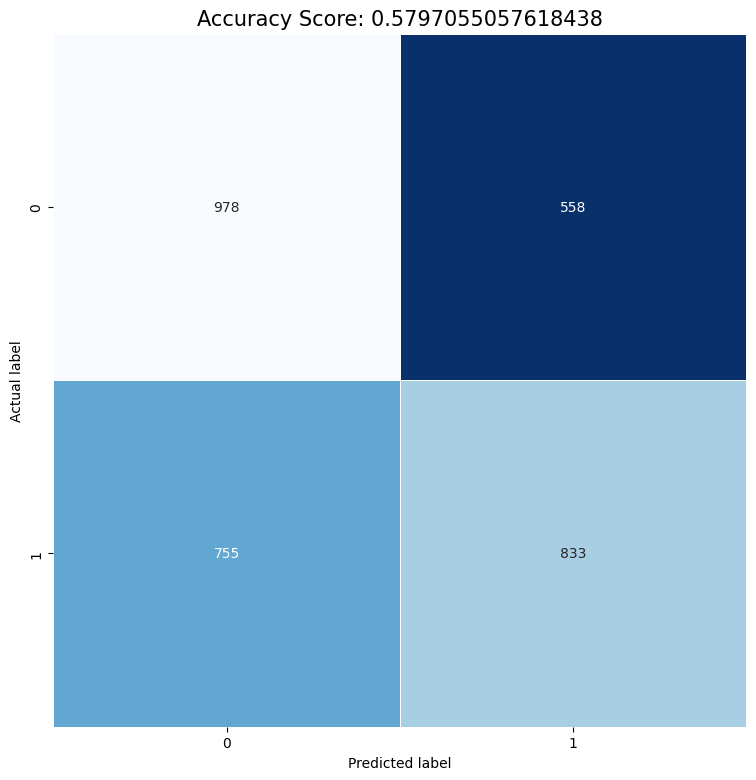

In [141]:
evaluate_model(y_test, y_pred_undersampled, y_pred_undersampled)

# K-Means Clustering

In [142]:
from sklearn.cluster import KMeans
from sklearn.base import clone



In [143]:
# Step 1: Preprocess the data
# Assuming 'data' is your DataFrame and 'features' and 'target' are lists of feature and target names
X1 = data_im.drop('readmitted', axis=1) 
y = data_im['readmitted']

In [144]:
# Step 2: Apply K-Means
# Choose an appropriate number of clusters; you might use the elbow method or domain knowledge to decide
kmeans = KMeans(n_clusters=2, random_state=2)
clusters = kmeans.fit_predict(X1)

In [145]:
set(clusters)

{0, 1}

In [146]:
unique_clusters, cluster_counts = np.unique(clusters, return_counts=True)

# Create a dictionary to hold the counts of each cluster
cluster_count_dict = dict(zip(unique_clusters, cluster_counts))

# Print the count of each cluster
print("Cluster Counts:")
for cluster, count in cluster_count_dict.items():
    print(f"Cluster {cluster}: {count}")

Cluster Counts:
Cluster 0: 33037
Cluster 1: 39853


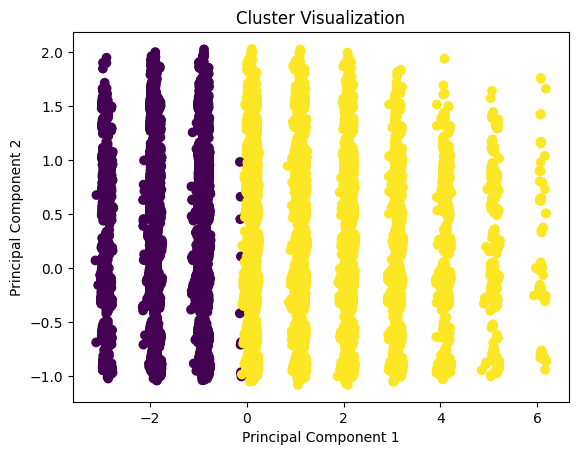

In [147]:

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=15)
X1_pca = pca.fit_transform(X1)
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

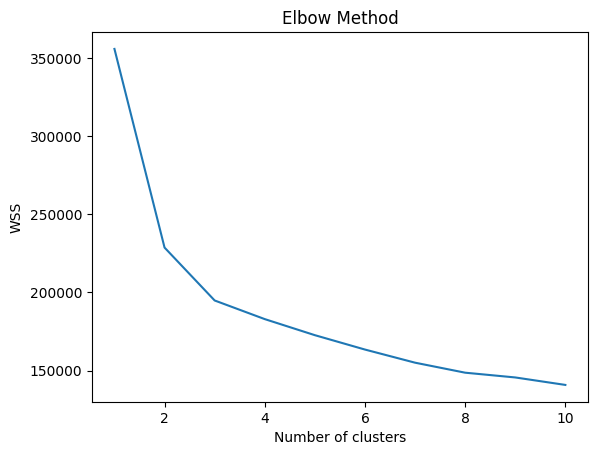

In [148]:
#Plot Elbow Method

wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS') # Within cluster sum of squares
plt.show()

In [149]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1_pca, clusters, test_size=0.2, random_state=2)


In [150]:
# Train on X1 data
X1_model = LogisticRegression(max_iter=1000, random_state=2)
X1_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=2)

In [151]:
# Evaluate X1 model
y_pred_X1 = X1_model.predict(X_test)
accuracy_X1 = accuracy_score(y_test, y_pred_X1)
print("X1 Model Accuracy on Test Data:", accuracy_X1)

X1 Model Accuracy on Test Data: 0.999862806969406


Accuracy: 0.999862806969406
Confusion Matrix:
 [[6558    2]
 [   0 8018]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6560
           1       1.00      1.00      1.00      8018

    accuracy                           1.00     14578
   macro avg       1.00      1.00      1.00     14578
weighted avg       1.00      1.00      1.00     14578

ROC AUC Score: 0.9998475609756098


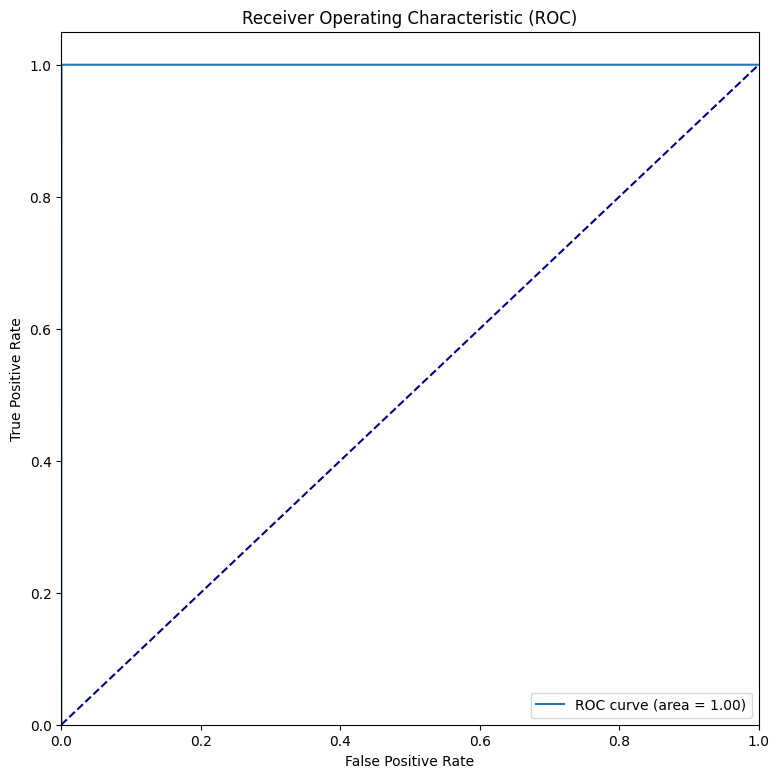

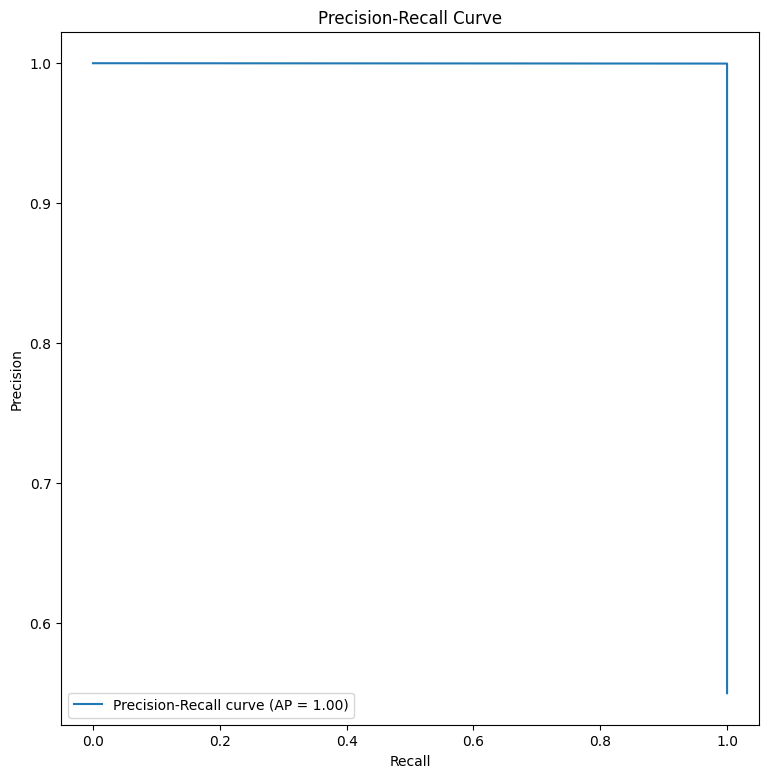

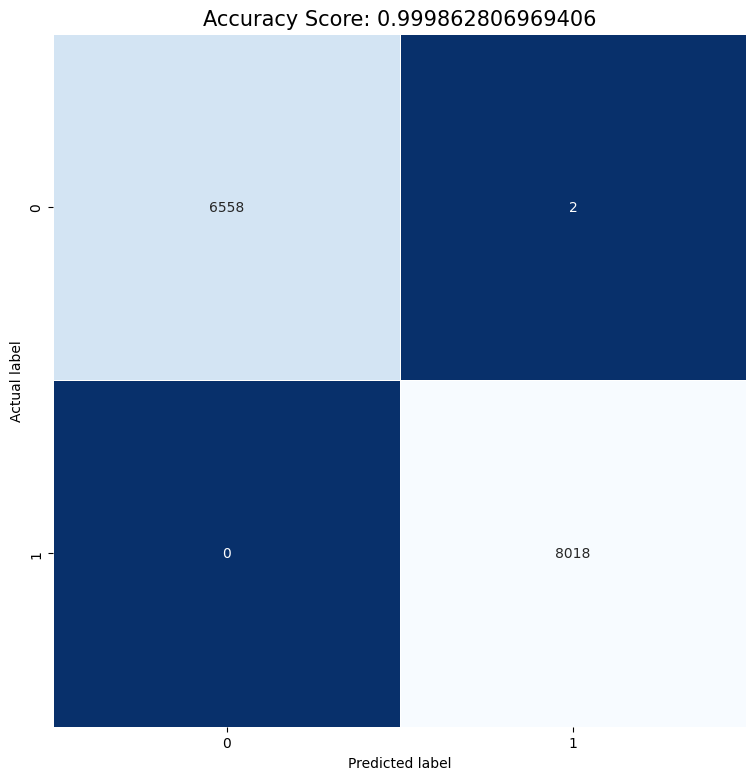

In [152]:
evaluate_model(y_test, y_pred_X1, y_pred_X1)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize a dictionary to store local classifiers
local_classifiers = {}

# Iterate over each unique cluster label
for cluster_label in np.unique(clusters):
    # Select indices corresponding to the current cluster label
    cluster_indices = np.where(clusters == cluster_label)[0]
    
    # Extract subset of features and target for the current cluster
    X_cluster = X1.iloc[cluster_indices]
    y_cluster = y.iloc[cluster_indices]
    
    # Split the cluster subset into training and testing sets
    X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=2)
    
    # Initialize and train a classifier for the current cluster
    classifier = LogisticRegression(max_iter=1000, random_state=2)
    classifier.fit(X_train_cluster, y_train_cluster)
    
    # Predict on the test set and evaluate performance
    y_pred_cluster = classifier.predict(X_test_cluster)
    accuracy_cluster = accuracy_score(y_test_cluster, y_pred_cluster)
    
    # Store the trained classifier in the dictionary
    local_classifiers[cluster_label] = {
        'classifier': classifier,
        'accuracy': accuracy_cluster
    }

# Print the accuracy of each local classifier
for cluster_label, info in local_classifiers.items():
    print(f"Cluster {cluster_label} - Accuracy: {info['accuracy']:.2f}")


Cluster 0 - Accuracy: 0.88
Cluster 1 - Accuracy: 0.91


In [154]:
local_classifiers

{0: {'classifier': LogisticRegression(max_iter=1000, random_state=2),
  'accuracy': 0.8804479418886199},
 1: {'classifier': LogisticRegression(max_iter=1000, random_state=2),
  'accuracy': 0.9069125580228328}}

In [156]:


for cluster_label, classifier_info in local_classifiers.items():
    # Assuming X_test is your test dataset
    # Generate predictions for the current classifier
    y_pred = classifier_info['classifier'].predict(X_test_cluster)
    
    # Get unique values and their counts in the predictions
    unique, counts = np.unique(y_pred, return_counts=True)
    
    print(f"Classifier for cluster {cluster_label}:")
    print("Unique value counts in predictions:")
    print(dict(zip(unique, counts)))
    print()  # Print a newline for better readability


Classifier for cluster 0:
Unique value counts in predictions:
{0: 7971}

Classifier for cluster 1:
Unique value counts in predictions:
{0: 7971}



In [157]:
local_classifiers[0]['classifier']

LogisticRegression(max_iter=1000, random_state=2)

In [158]:
# Evaluate classifier model
y_pred_classifier = local_classifiers[0]['classifier'].predict(X_test_cluster)
accuracy_classifier = accuracy_score(y_test_cluster, y_pred_classifier)
print("Classifier1 Model Accuracy on Test Data:", accuracy_classifier)

Classifier1 Model Accuracy on Test Data: 0.9069125580228328


Accuracy: 0.9069125580228328
Confusion Matrix:
 [[7229    0]
 [ 742    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      7229
           1       0.00      0.00      0.00       742

    accuracy                           0.91      7971
   macro avg       0.45      0.50      0.48      7971
weighted avg       0.82      0.91      0.86      7971

ROC AUC Score: 0.5


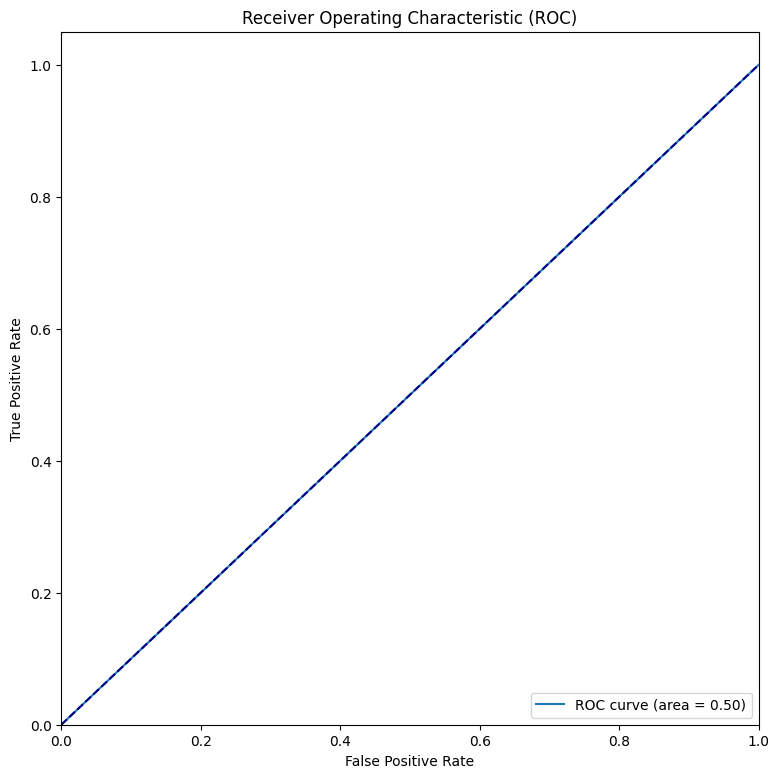

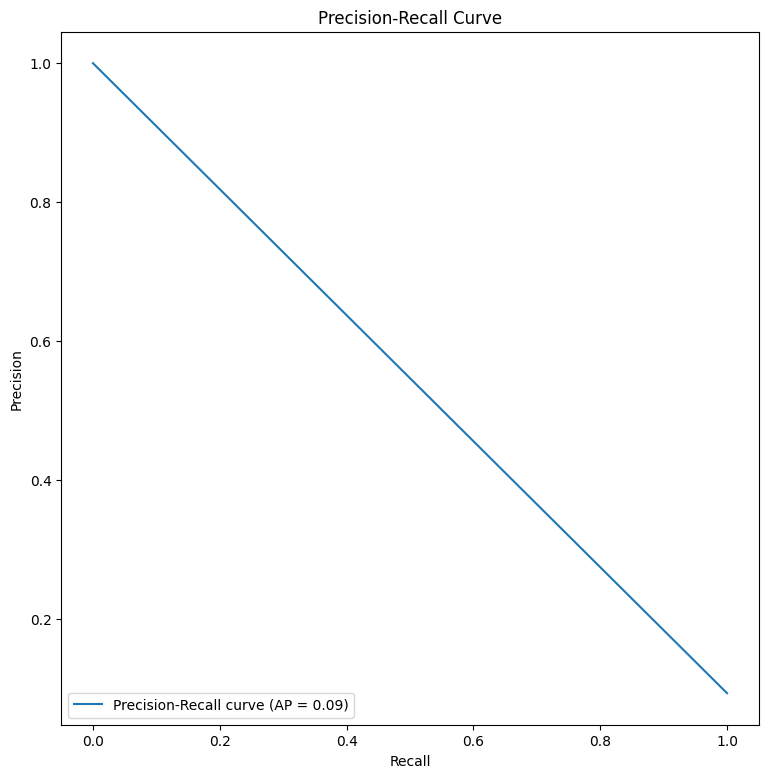

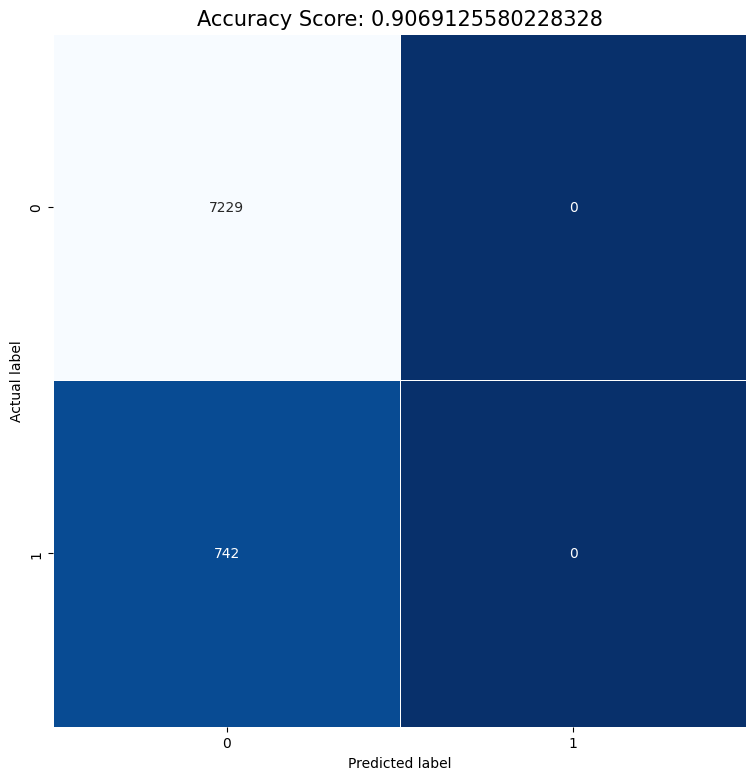

In [159]:
evaluate_model(y_test_cluster,y_pred_classifier,y_pred_classifier)

In [160]:
local_classifiers[1]['classifier']

LogisticRegression(max_iter=1000, random_state=2)

In [161]:
# Evaluate classifier1 model
y_pred_classifier1 = local_classifiers[1]['classifier'].predict(X_test_cluster)
accuracy_classifier1 = accuracy_score(y_test_cluster, y_pred_classifier)
print("Classifier Model Accuracy on Test Data:", accuracy_classifier)

Classifier Model Accuracy on Test Data: 0.9069125580228328


Accuracy: 0.9069125580228328
Confusion Matrix:
 [[7229    0]
 [ 742    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      7229
           1       0.00      0.00      0.00       742

    accuracy                           0.91      7971
   macro avg       0.45      0.50      0.48      7971
weighted avg       0.82      0.91      0.86      7971

ROC AUC Score: 0.5


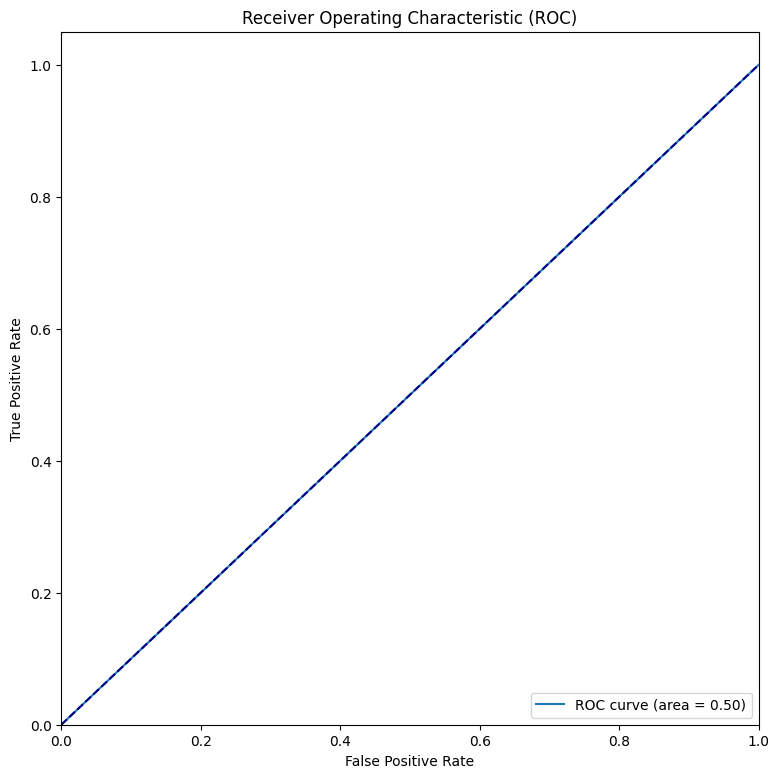

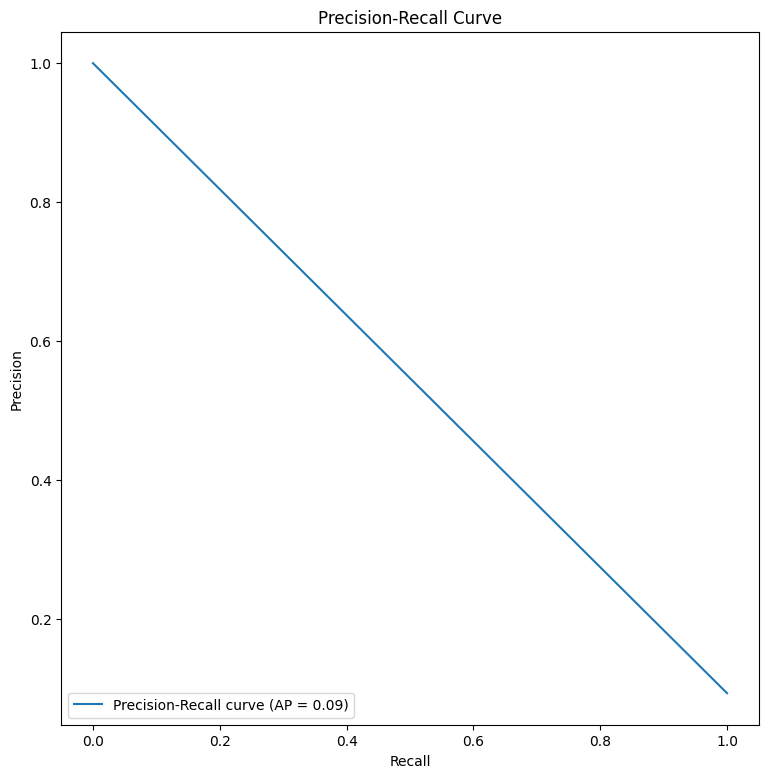

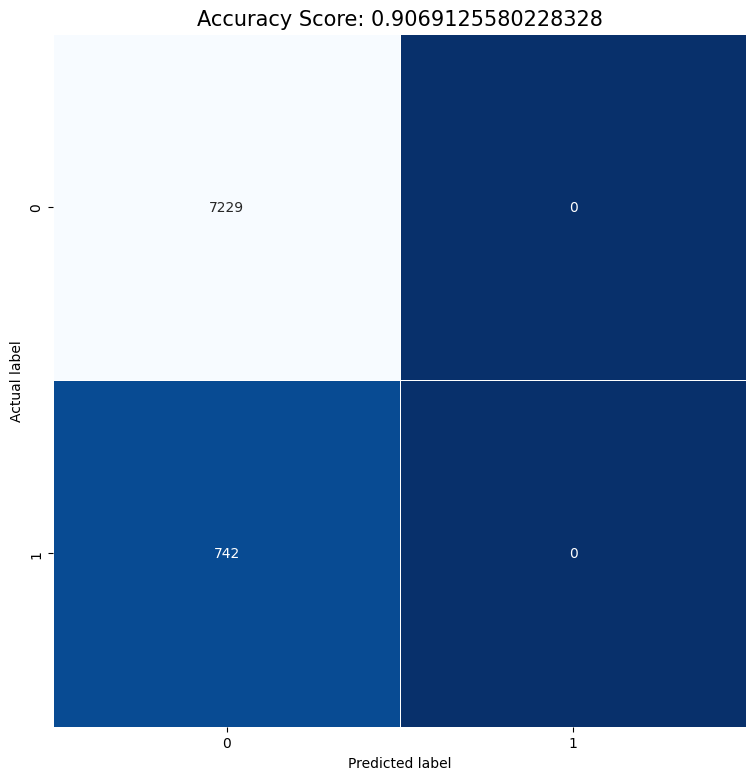

In [162]:
evaluate_model(y_test_cluster,y_pred_classifier1,y_pred_classifier1)